# Monthly Prediction

## Imports and Functions

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import TimeSeriesSplit

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout, GRU, Conv1D, Flatten, Reshape

from sklearn.svm import SVR
import os
import numpy as np
from xgboost import XGBRegressor
import sys
from catboost import CatBoostRegressor

In [4]:
# Add the folder to the Python path

os.chdir("../")
# change working directory to project's root path
print(os.getcwd())

FIRST_YEAR= 1972
FREQUENCY= "monthly"

c:\Users\marti\Desktop\data\hw_extra


In [5]:
folder_path = os.path.abspath("functions/") #INPUT_PATH)#'path_to_your_folder')  # Replace with the actual folder path
sys.path.insert(0, folder_path)

from Predictions import (
    PredictionExperiment,
    PredictionModel
)

c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [11]:
indices_of_interest = ["HWN", "HWF", "HWD", "HWM", "HWA"]


In [4]:
kernel_rbf_noise = RBF(length_scale=1.0) + WhiteKernel(noise_level=1)
regressors = [LinearRegression(),
            RandomForestRegressor(random_state=42, n_estimators=5),
            RandomForestRegressor(random_state=42, n_estimators=10),
            RandomForestRegressor(random_state=42, n_estimators=15), 
            SVR(kernel='rbf'),
            SVR(kernel='linear', max_iter=200),
            SVR(kernel='poly', max_iter=200),
            XGBRegressor(booster="gblinear",random_state=42, n_estimators=5, learning_rate=0.1),
            XGBRegressor(booster="gblinear",random_state=42, n_estimators=10, learning_rate=0.1),
            XGBRegressor(booster="gblinear",random_state=42, n_estimators=15, learning_rate=0.1),
            XGBRegressor(booster="gbtree",random_state=42, n_estimators=5, learning_rate=0.1),
            XGBRegressor(booster="gbtree", random_state=42, n_estimators=10, learning_rate=0.1),
            XGBRegressor(booster="gbtree", random_state=42, n_estimators=15, learning_rate=0.1),
            GaussianProcessRegressor(kernel=kernel_rbf_noise, random_state=42, n_restarts_optimizer=10),
            CatBoostRegressor(learning_rate=0.1, iterations=10, verbose=False,random_state=42),
            CatBoostRegressor(learning_rate=0.1, iterations=20, verbose=False,random_state=42),
            CatBoostRegressor(learning_rate=0.1, iterations=30, verbose=False,random_state=42),
            ]
name_regressors = ["Linear", "RF5", "RF10", "RF15", "SVR-rbf", "SVR-linear", "SVR-cubic","XGBL5", "XGBL10", "XGBL15", "XGBT5", "XGBT10", "XGBT15", "GPR-rbf-noise", "CBR-10", "CBR-20","CBR-30"]
indices_of_interest = ["HWN", "HWF", "HWD", "HWM", "HWA"]
assert len(regressors)==len(name_regressors)

## California

In [5]:
region="california"
metadata_path = f"data/climate_features/{region}/metadata.csv"
metadata = pd.read_csv(metadata_path)
metadata.reset_index(inplace=True, drop=True)
display(metadata)

id                       filename  season   
0   6e47cb06   predictor_6e47cb06_1.parquet       1  \
1   6e47cb06   predictor_6e47cb06_2.parquet       2   
2   6e47cb06   predictor_6e47cb06_3.parquet       3   
3   6e47cb06   predictor_6e47cb06_4.parquet       4   
4   6e47cb06   predictor_6e47cb06_5.parquet       5   
5   6e47cb06   predictor_6e47cb06_6.parquet       6   
6   6e47cb06   predictor_6e47cb06_7.parquet       7   
7   6e47cb06   predictor_6e47cb06_8.parquet       8   
8   6e47cb06   predictor_6e47cb06_9.parquet       9   
9   6e47cb06  predictor_6e47cb06_10.parquet      10   
10  6e47cb06  predictor_6e47cb06_11.parquet      11   
11  6e47cb06  predictor_6e47cb06_12.parquet      12   
12  5cb3fa02   predictor_5cb3fa02_1.parquet       1   
13  5cb3fa02   predictor_5cb3fa02_2.parquet       2   
14  5cb3fa02   predictor_5cb3fa02_3.parquet       3   
15  5cb3fa02   predictor_5cb3fa02_4.parquet       4   
16  5cb3fa02   predictor_5cb3fa02_5.parquet       5   
17  5cb3fa02   predictor_5cb3fa02_6.parquet       6   
18  5cb3fa02   predictor_5cb3fa02_7.parquet       7   
19  5cb3fa02   predictor_5cb3fa02_8.parquet       8   
20  5cb3fa02   predictor_5cb3fa02_9.parquet       9   
21  5cb3fa02  predictor_5cb3fa02_10.parquet      10   
22  5cb3fa02  predictor_5cb3fa02_11.parquet      11   
23  5cb3fa02  predictor_5cb3fa02_12.parquet      12   

                                              indices  
0   df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...  
1   df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...  
2   df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...  
3   df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...  
4   df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...  
5   df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...  
6   df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...  
7   df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...  
8   df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...  
9   df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...  
10  df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...  
11  df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...  
12  fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...  
13  fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...  
14  fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...  
15  fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...  
16  fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...  
17  fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...  
18  fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...  
19  fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...  
20  fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...  
21  fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...  
22  fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...  
23  fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...

In [6]:
results = pd.read_csv(f"data/climate_results/{region}_results/results.csv")
ids_results = results["id_data"].unique()
id_experiments = metadata["id"].unique()
ids_to_execute = [id for id in id_experiments if id not in ids_results]
print(len(ids_to_execute))

0


In [7]:
k=0
for id in ids_to_execute:
    k+=1
    print("Executing",id, "iter", k)
    data = {i: pd.read_parquet(f"data/climate_features/{region}/predictor_{id}_{i}.parquet") for i in range(1,13)}
    # rnn_model = Sequential([
    # SimpleRNN(16, activation="tanh", input_shape=(1, len(data[1].columns) - len(indices_of_interest))),
    # Dropout(0.1),  # Regularization
    # Dense(8, activation="relu"),
    # Dense(len(indices_of_interest))  # Predict 5 indices
    # ])
    # lstm_model = Sequential([
    # LSTM(16, activation="tanh", input_shape=(1, len(data[1].columns) - len(indices_of_interest))),
    # Dropout(0.1),  # Regularization
    # Dense(8, activation="relu"),
    # Dense(len(indices_of_interest))  # Predict 5 indices
    # ])
    gru_model = Sequential([
        GRU(16, activation="tanh", input_shape=(1, len(data[12].columns) - len(indices_of_interest))),
        Dropout(0.1),
        Dense(8, activation="relu"),
        Dense(len(indices_of_interest))
    ])
    # Stacked RNN
    stacked_rnn = Sequential([
        SimpleRNN(16, activation="tanh", return_sequences=True, input_shape=(1, len(data[12].columns) - len(indices_of_interest))),
        SimpleRNN(8, activation="tanh"),
        Dropout(0.1),
        Dense(len(indices_of_interest))
    ])

    # Stacked LSTM
    stacked_lstm = Sequential([
        LSTM(16, activation="tanh", return_sequences=True, input_shape=(1, len(data[12].columns) - len(indices_of_interest))),
        LSTM(8, activation="tanh"),
        Dropout(0.1),
        Dense(len(indices_of_interest))
    ])
    cnn_rnn_model = Sequential([
        Conv1D(16, kernel_size=1, activation="relu", input_shape=(1, len(data[12].columns) - len(indices_of_interest))),
        Reshape((1, 16)),  # Back to time dimension
        SimpleRNN(8, activation="tanh"),
        Dropout(0.1),
        Dense(len(indices_of_interest))
    ])
    lp_model = Sequential([
        Flatten(input_shape=(1, len(data[12].columns) - len(indices_of_interest))),
        Dense(16, activation="relu"),
        Dropout(0.1),
        Dense(8, activation="relu"),
        Dense(len(indices_of_interest))
    ])
    experiment_1 = PredictionExperiment(data, indices_of_interest, [gru_model, stacked_rnn, stacked_lstm, cnn_rnn_model, lp_model], ["GRU16", "SRNN16", "SLSTM16", "CNNRNN16", "MLP16"], 5, id)
    experiment_1.execute_experiment()
    experiment_1.get_metrics("r2", "prediction", show=False)
    experiment_1.get_metrics("mape", "prediction", show=False)
    experiment_1.get_metrics("r2", stage="training", show=False)
    experiment_1.get_metrics("mape", stage="training", show=False)
    experiment_1.get_metrics("r2", stage="TSCV", show=False)
    experiment_1.get_metrics("mape", stage="TSCV", show=False)
    #experiment_1.top_results("r2", 5, stage="prediction", top_data_path=f"data/results/{FREQUENCY}/top_results.csv")
    #experiment_1.top_results("cv_r2", 5, stage="CV", top_data_path=f"data/results/{FREQUENCY}/top_results.csv")
    experiment_1.save_results(f"data/climate_results/{region}_results/results.csv")

## Chile

In [6]:
region="chile"
metadata = pd.read_csv(f"data/climate_features/{region}/metadata.csv")
metadata.reset_index(inplace=True, drop=True)
display(metadata)

id                       filename  season   
0    978f49d7   predictor_978f49d7_1.parquet       1  \
1    978f49d7   predictor_978f49d7_2.parquet       2   
2    978f49d7   predictor_978f49d7_3.parquet       3   
3    978f49d7   predictor_978f49d7_4.parquet       4   
4    978f49d7   predictor_978f49d7_5.parquet       5   
..        ...                            ...     ...   
247  458d357c   predictor_458d357c_8.parquet       8   
248  458d357c   predictor_458d357c_9.parquet       9   
249  458d357c  predictor_458d357c_10.parquet      10   
250  458d357c  predictor_458d357c_11.parquet      11   
251  458d357c  predictor_458d357c_12.parquet      12   

                                               indices  
0    fde0e327-340e2882-43701738-e306f58b-e601b072-e...  
1    fde0e327-340e2882-43701738-e306f58b-e601b072-e...  
2    fde0e327-340e2882-43701738-e306f58b-e601b072-e...  
3    fde0e327-340e2882-43701738-e306f58b-e601b072-e...  
4    fde0e327-340e2882-43701738-e306f58b-e601b072-e...  
..                                                 ...  
247  32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...  
248  32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...  
249  32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...  
250  32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...  
251  32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...  

[252 rows x 4 columns]

In [7]:
results = pd.read_csv(f"data/climate_results/{region}_results/results.csv")
ids_results = results["id_data"].unique()
id_experiments = metadata["id"].unique()
ids_to_execute = [id for id in id_experiments if id not in ids_results]
print(len(ids_to_execute))


0


In [8]:
k=0
for id in ids_to_execute:
    k+=1
    print("Executing",id, "iter", k)
    data = {i: pd.read_parquet(f"data/climate_features/{region}/predictor_{id}_{i}.parquet") for i in range(1,13)}
    # rnn_model = Sequential([
    # SimpleRNN(16, activation="tanh", input_shape=(1, len(data[1].columns) - len(indices_of_interest))),
    # Dropout(0.1),  # Regularization
    # Dense(8, activation="relu"),
    # Dense(len(indices_of_interest))  # Predict 5 indices
    # ])
    # lstm_model = Sequential([
    # LSTM(16, activation="tanh", input_shape=(1, len(data[1].columns) - len(indices_of_interest))),
    # Dropout(0.1),  # Regularization
    # Dense(8, activation="relu"),
    # Dense(len(indices_of_interest))  # Predict 5 indices
    # ])
    # gru_model = Sequential([
    #     GRU(16, activation="tanh", input_shape=(1, len(data[12].columns) - len(indices_of_interest))),
    #     Dropout(0.1),
    #     Dense(8, activation="relu"),
    #     Dense(len(indices_of_interest))
    # ])
    # # Stacked RNN
    # stacked_rnn = Sequential([
    #     SimpleRNN(16, activation="tanh", return_sequences=True, input_shape=(1, len(data[12].columns) - len(indices_of_interest))),
    #     SimpleRNN(8, activation="tanh"),
    #     Dropout(0.1),
    #     Dense(len(indices_of_interest))
    # ])

    # Stacked LSTM
    stacked_lstm = Sequential([
        LSTM(16, activation="tanh", return_sequences=True, input_shape=(1, len(data[12].columns) - len(indices_of_interest))),
        LSTM(8, activation="tanh"),
        Dropout(0.1),
        Dense(len(indices_of_interest))
    ])
    cnn_rnn_model = Sequential([
        Conv1D(16, kernel_size=1, activation="relu", input_shape=(1, len(data[12].columns) - len(indices_of_interest))),
        Reshape((1, 16)),  # Back to time dimension
        SimpleRNN(8, activation="tanh"),
        Dropout(0.1),
        Dense(len(indices_of_interest))
    ])
    # lp_model = Sequential([
    #     Flatten(input_shape=(1, len(data[12].columns) - len(indices_of_interest))),
    #     Dense(16, activation="relu"),
    #     Dropout(0.1),
    #     Dense(8, activation="relu"),
    #     Dense(len(indices_of_interest))
    # ])
    experiment_1 = PredictionExperiment(data, indices_of_interest, [stacked_lstm, cnn_rnn_model], ["SLSTM16", "CNNRNN16"], 5, id)
    experiment_1.execute_experiment()
    experiment_1.get_metrics("r2", "prediction", show=False)
    experiment_1.get_metrics("mape", "prediction", show=False)
    experiment_1.get_metrics("r2", stage="training", show=False)
    experiment_1.get_metrics("mape", stage="training", show=False)
    experiment_1.get_metrics("r2", stage="TSCV", show=False)
    experiment_1.get_metrics("mape", stage="TSCV", show=False)
    #experiment_1.top_results("r2", 5, stage="prediction", top_data_path=f"data/results/{FREQUENCY}/top_results.csv")
    #experiment_1.top_results("cv_r2", 5, stage="CV", top_data_path=f"data/results/{FREQUENCY}/top_results.csv")
    experiment_1.save_results(f"data/climate_results/{region}_results/results.csv")

In [14]:
ids_to_execute = ["458d357c"]

Executing 458d357c iter 1
1/1 [==============================] - 0s 18ms/step


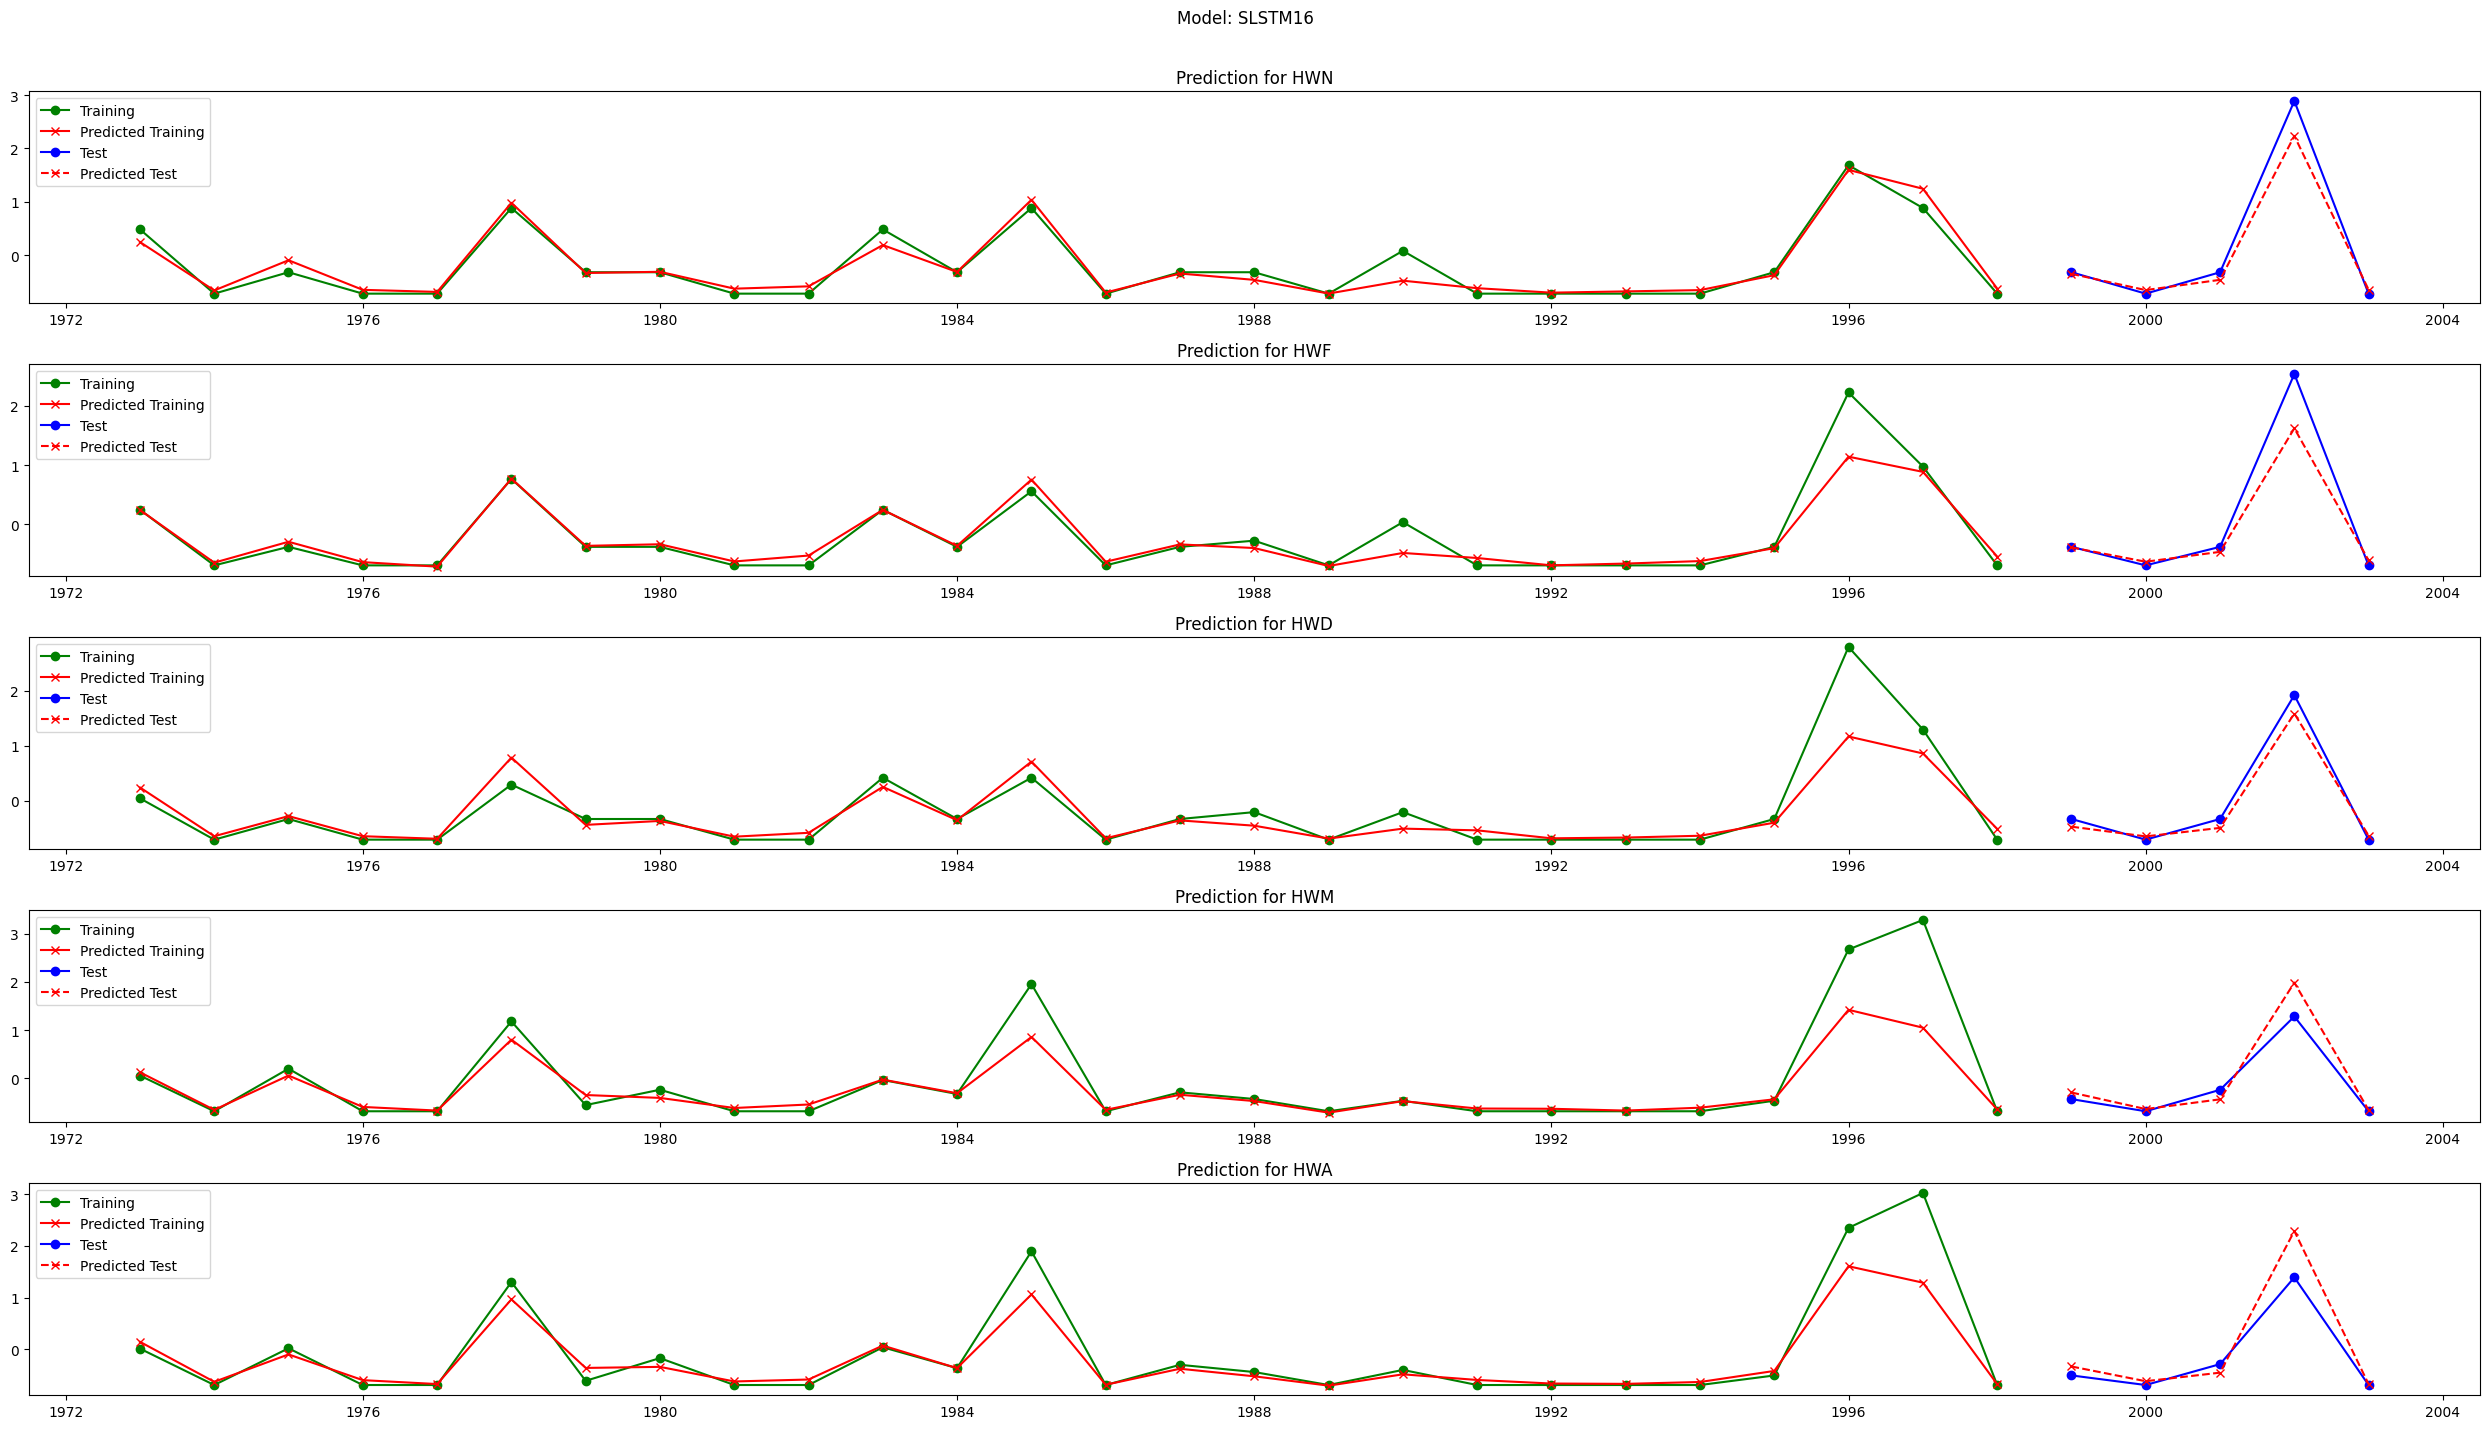

1/1 [==============================] - 0s 20ms/step


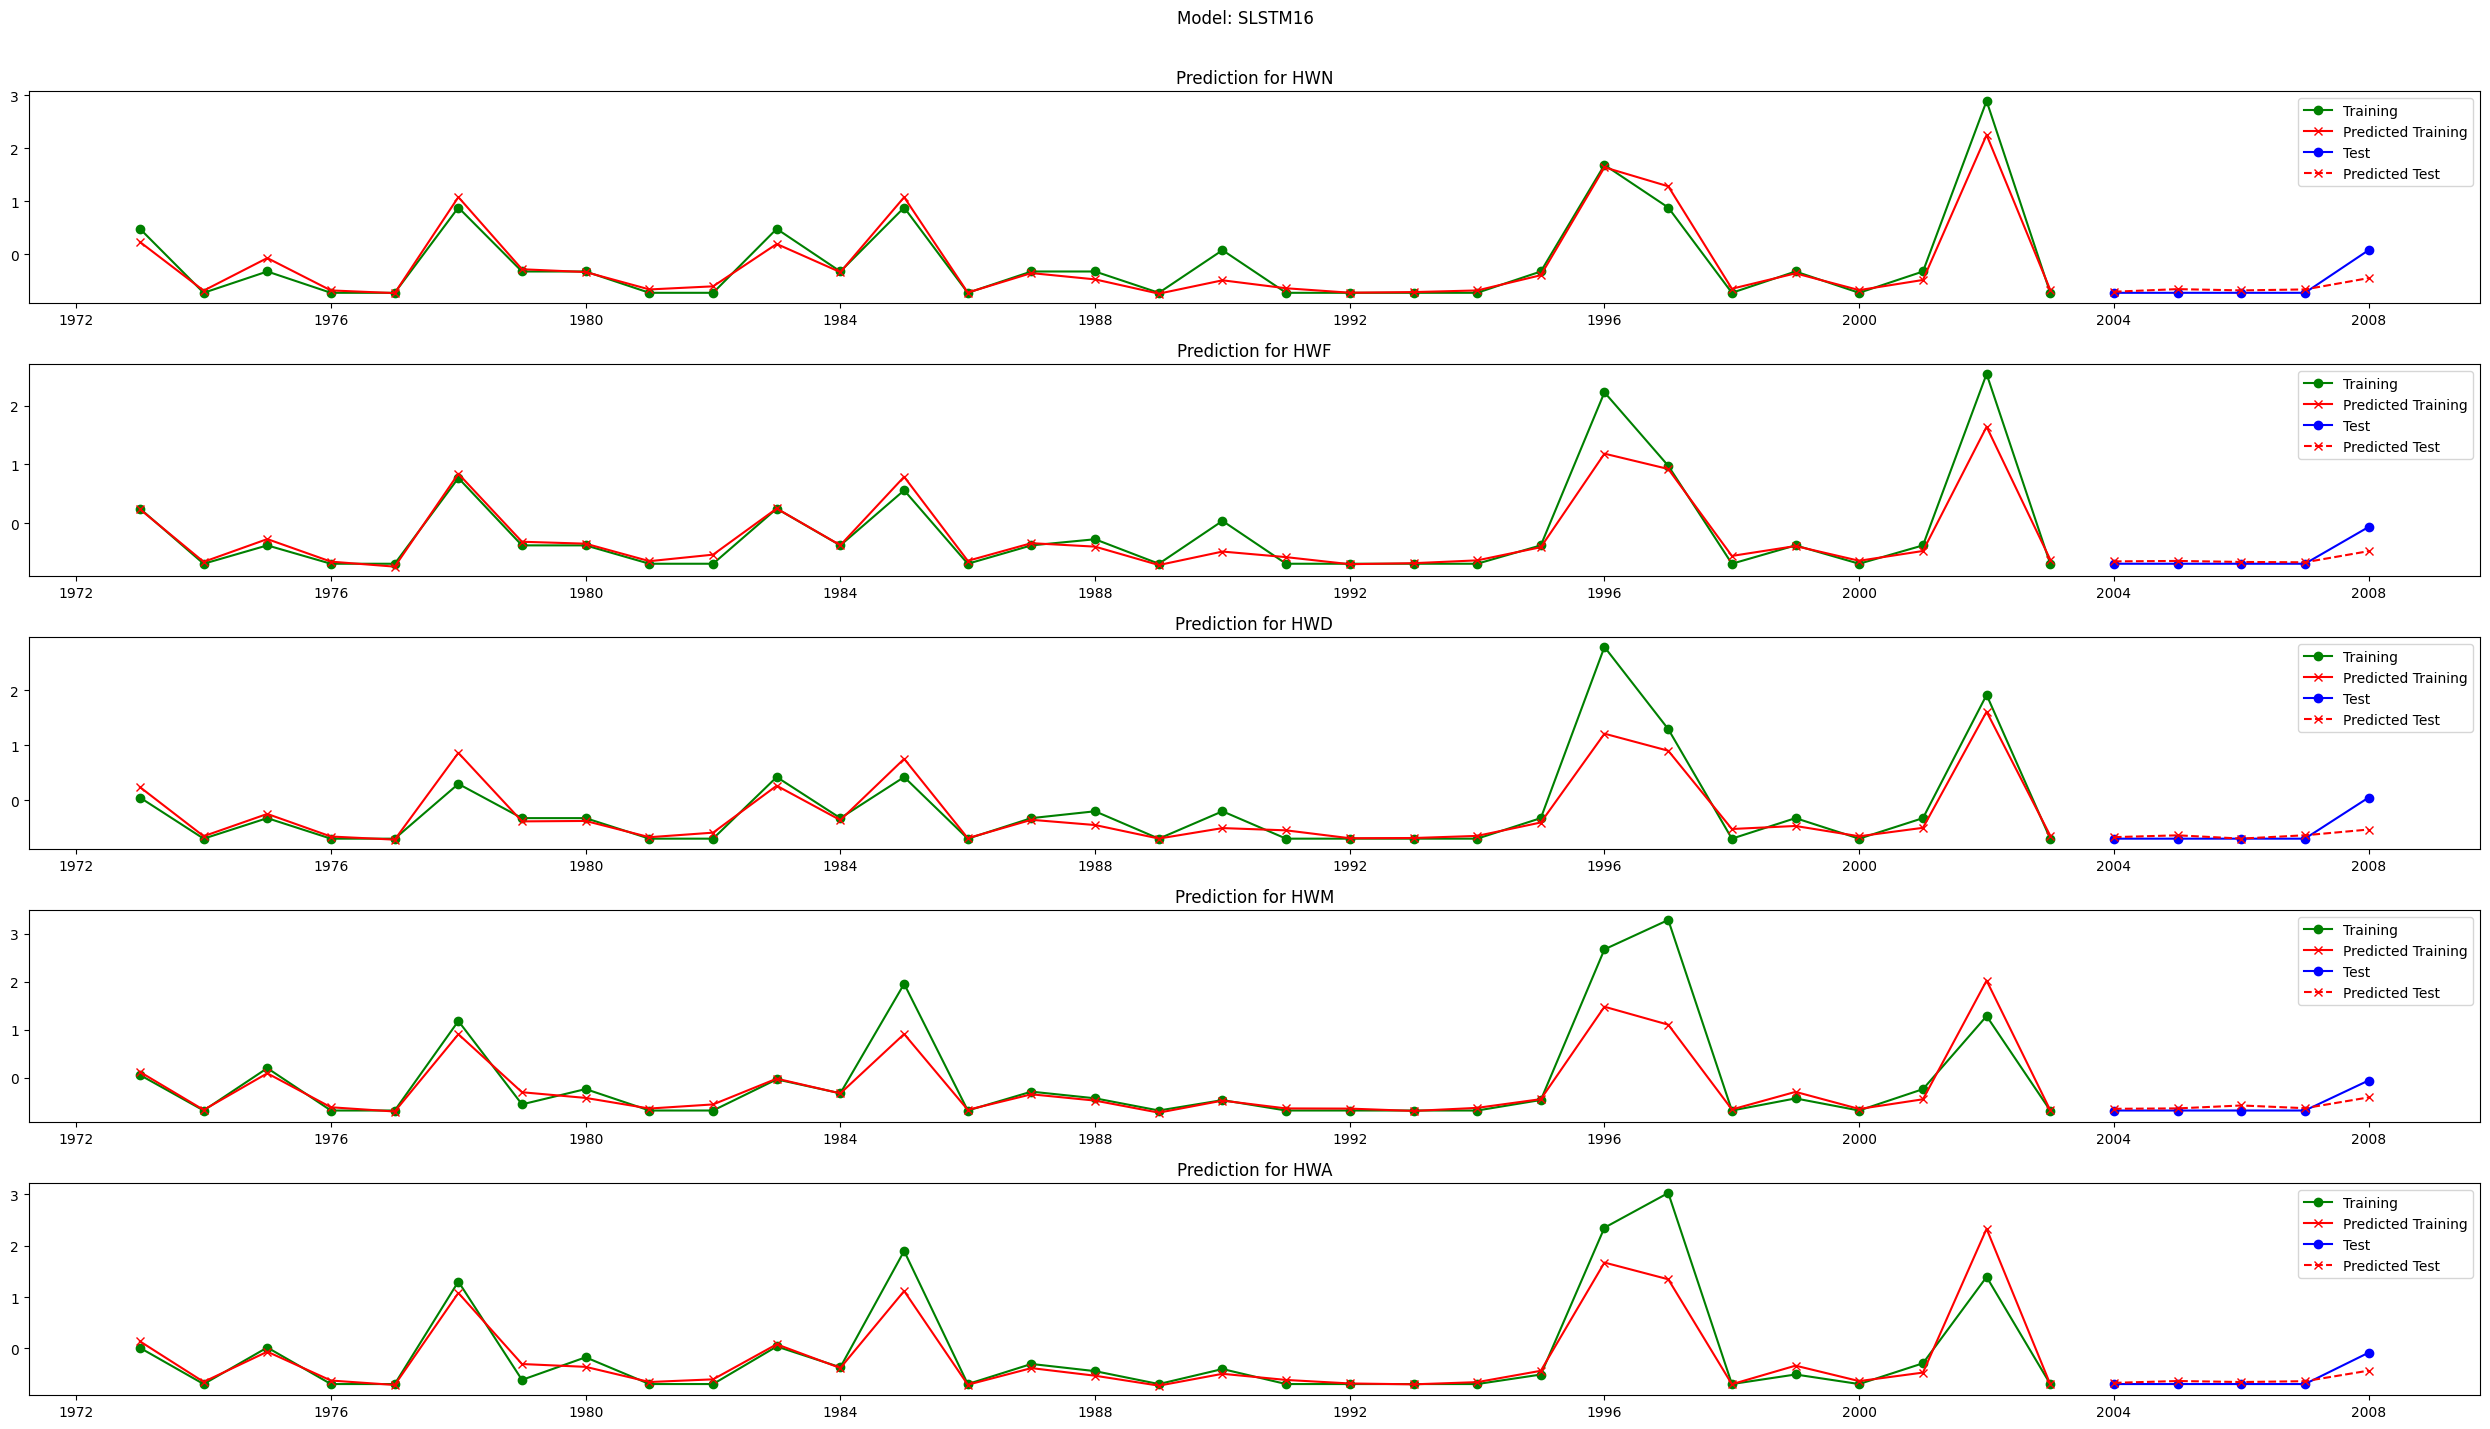

2/2 [==============================] - 0s 3ms/step


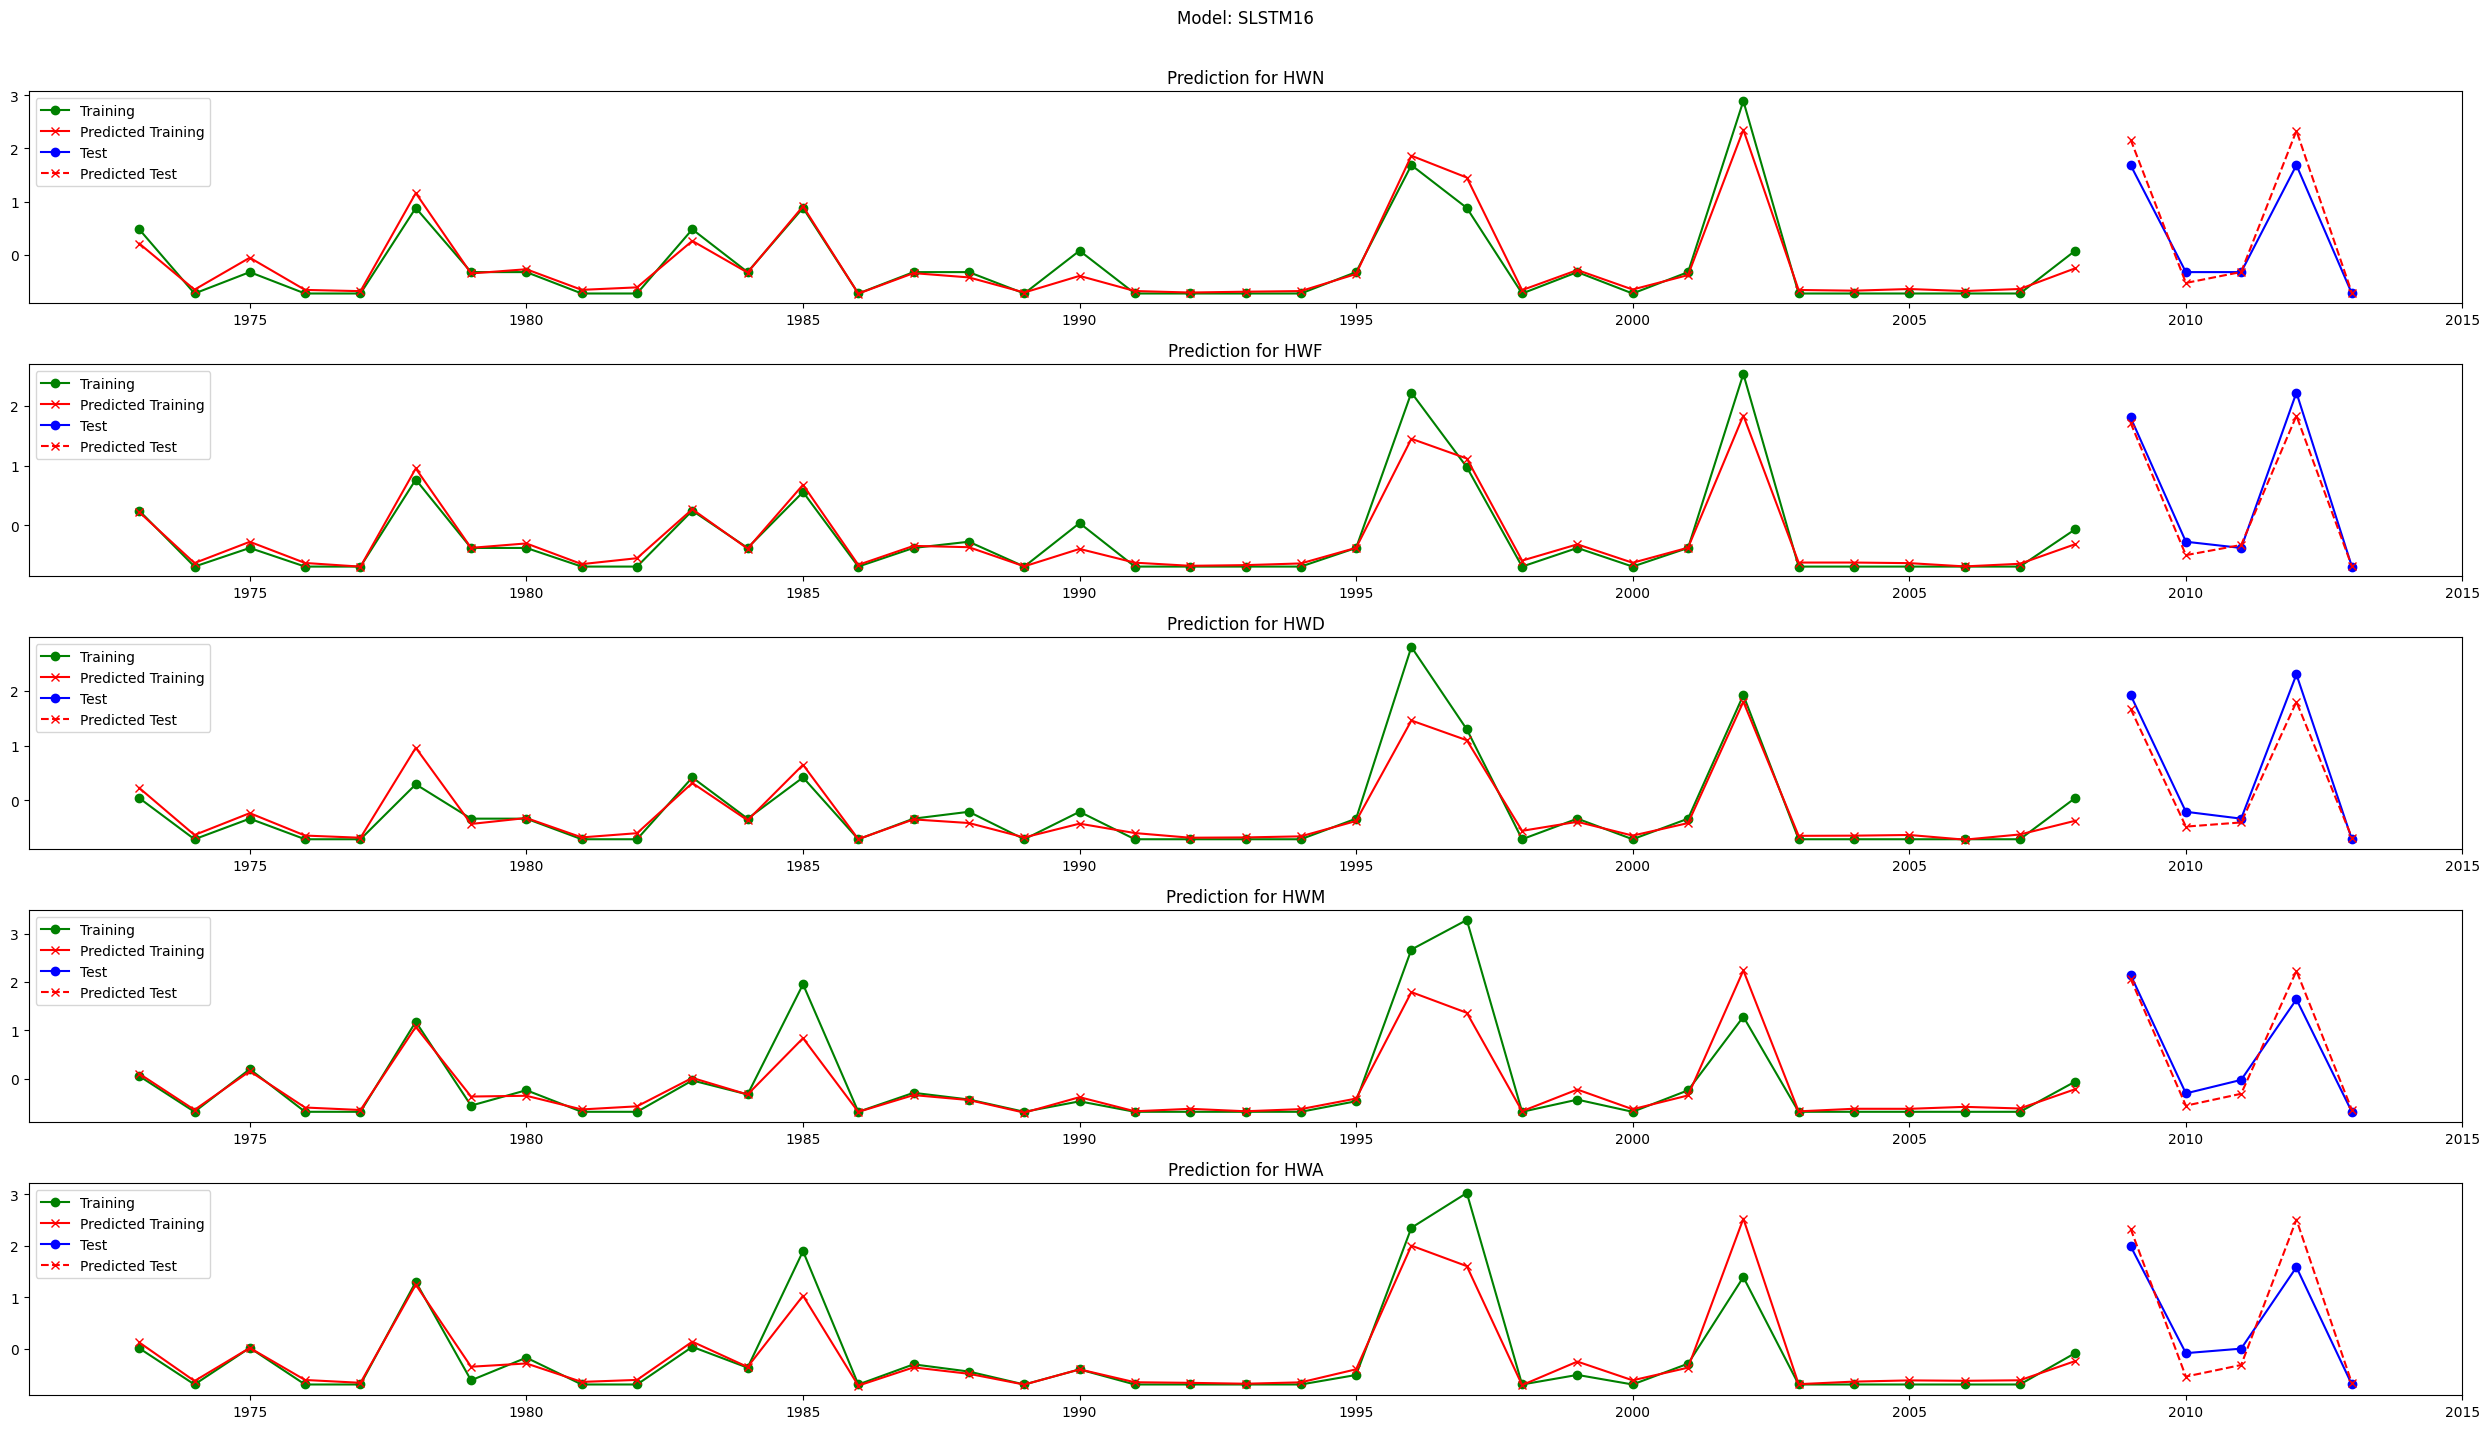

2/2 [==============================] - 0s 3ms/step


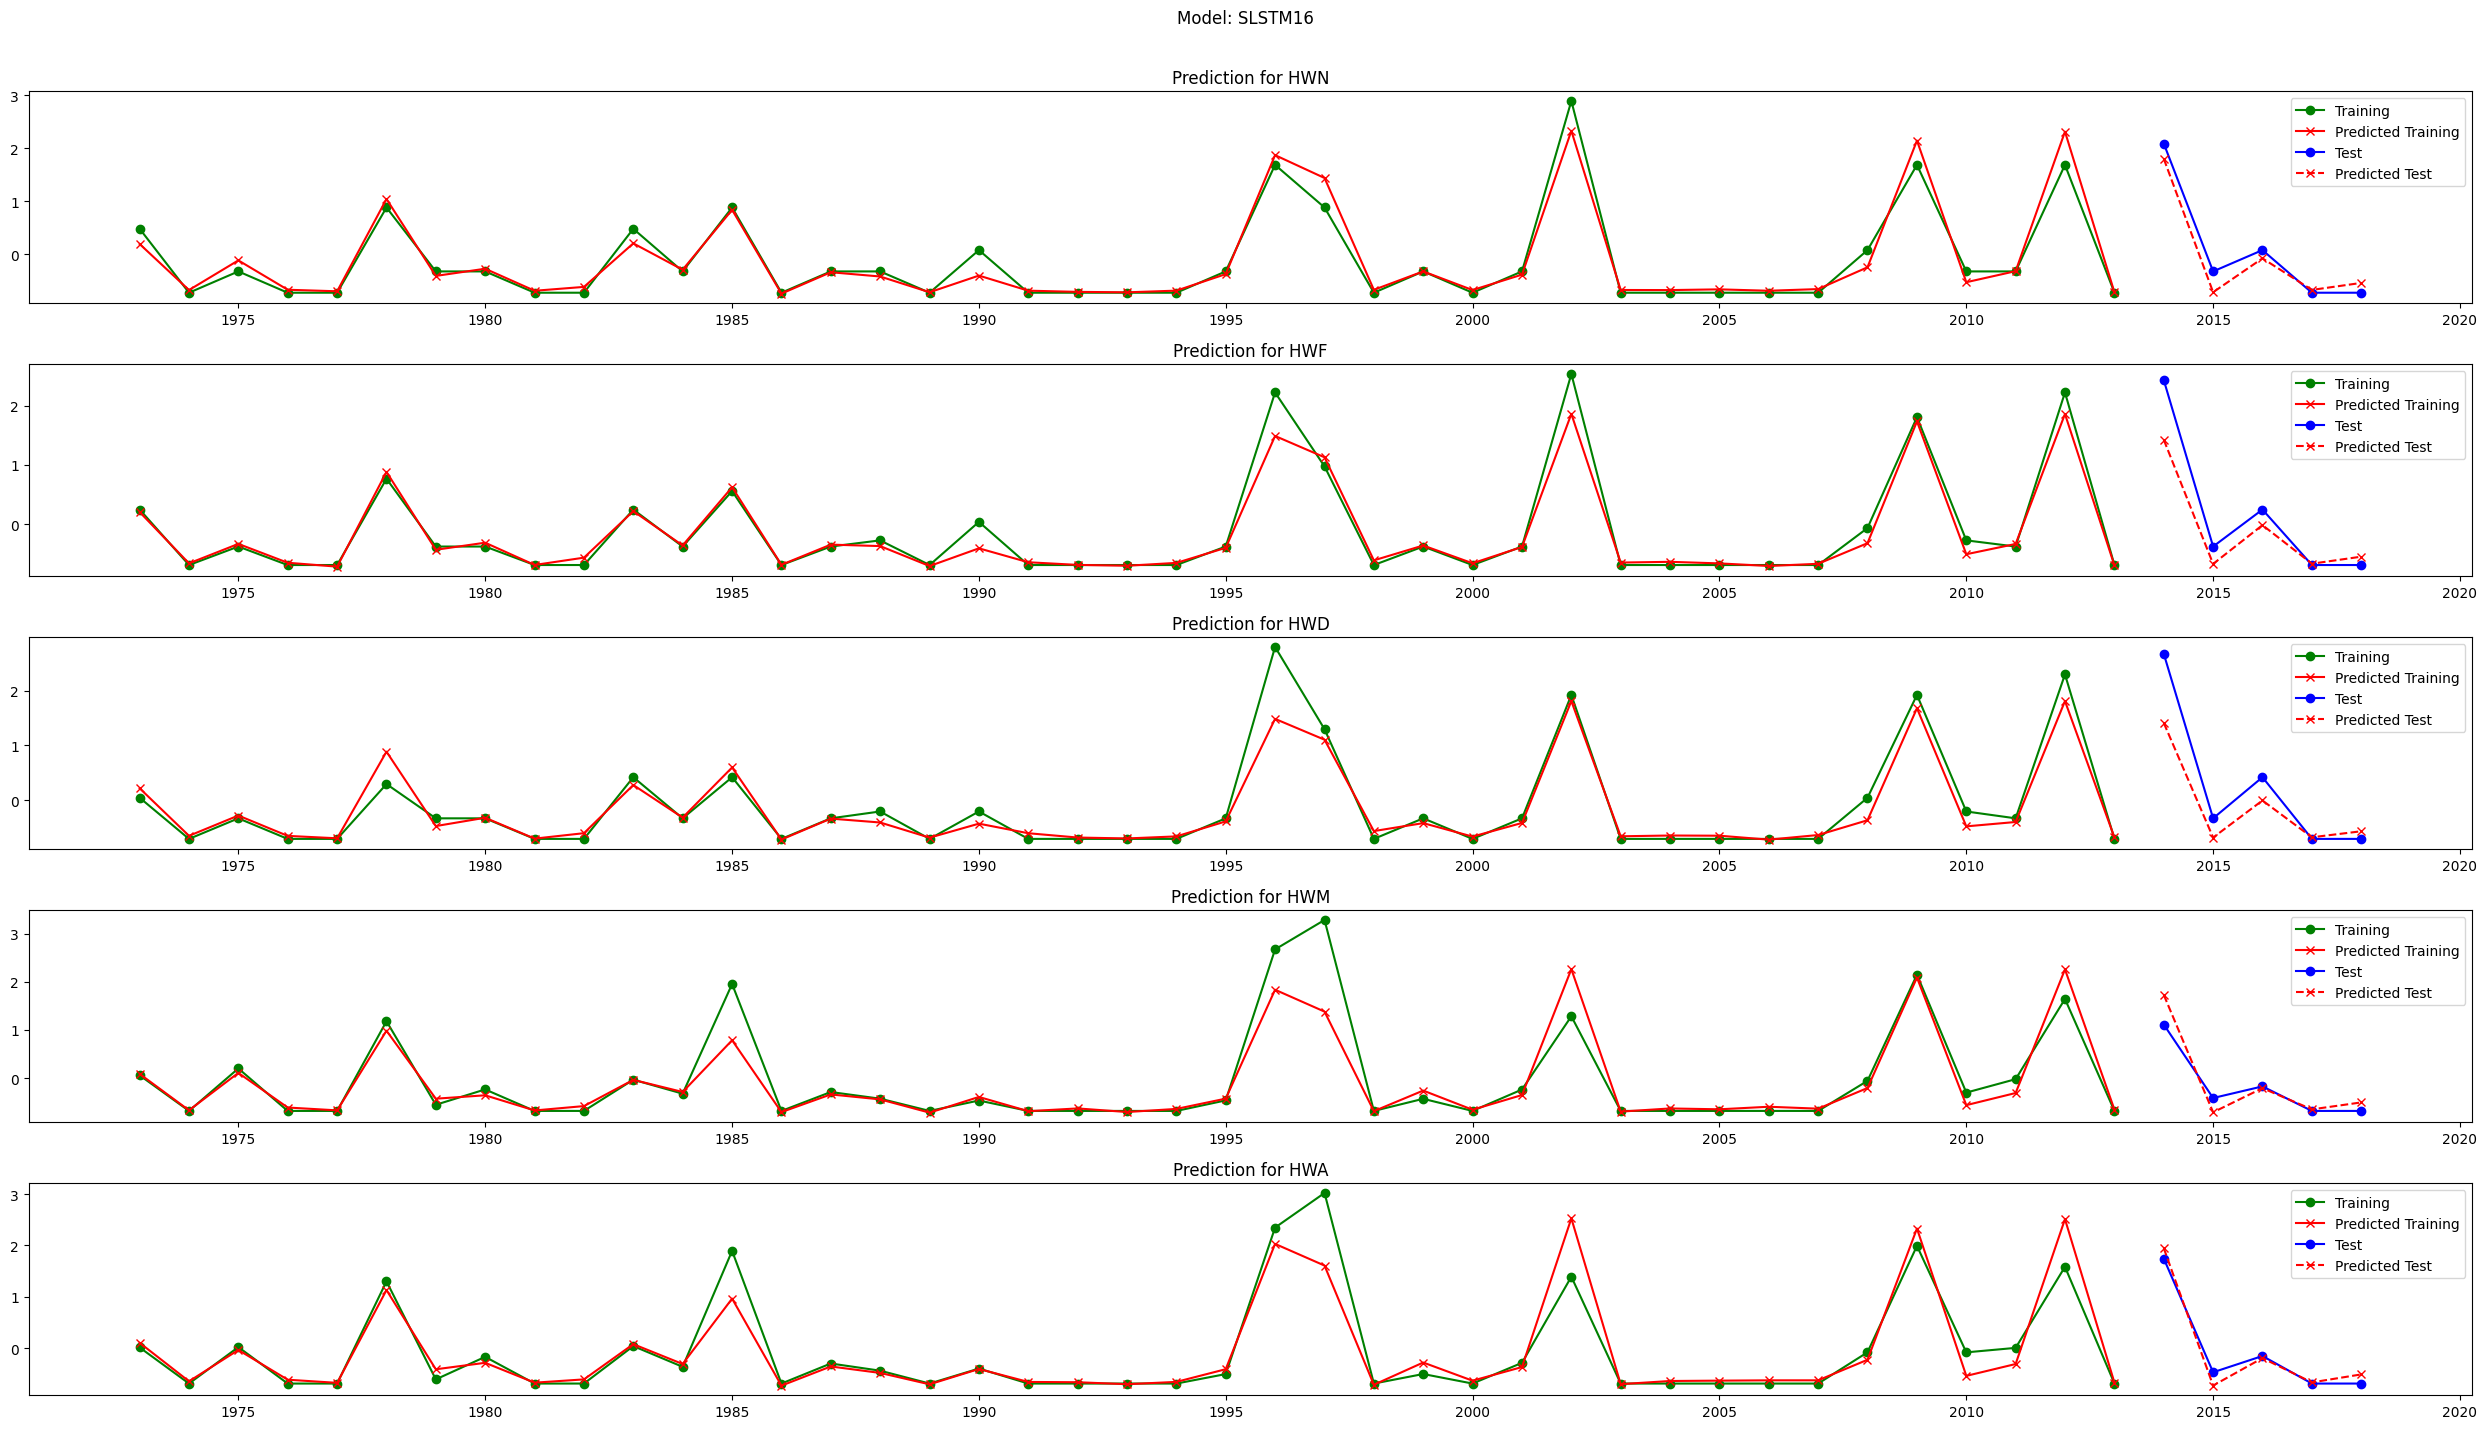

2/2 [==============================] - 0s 2ms/step


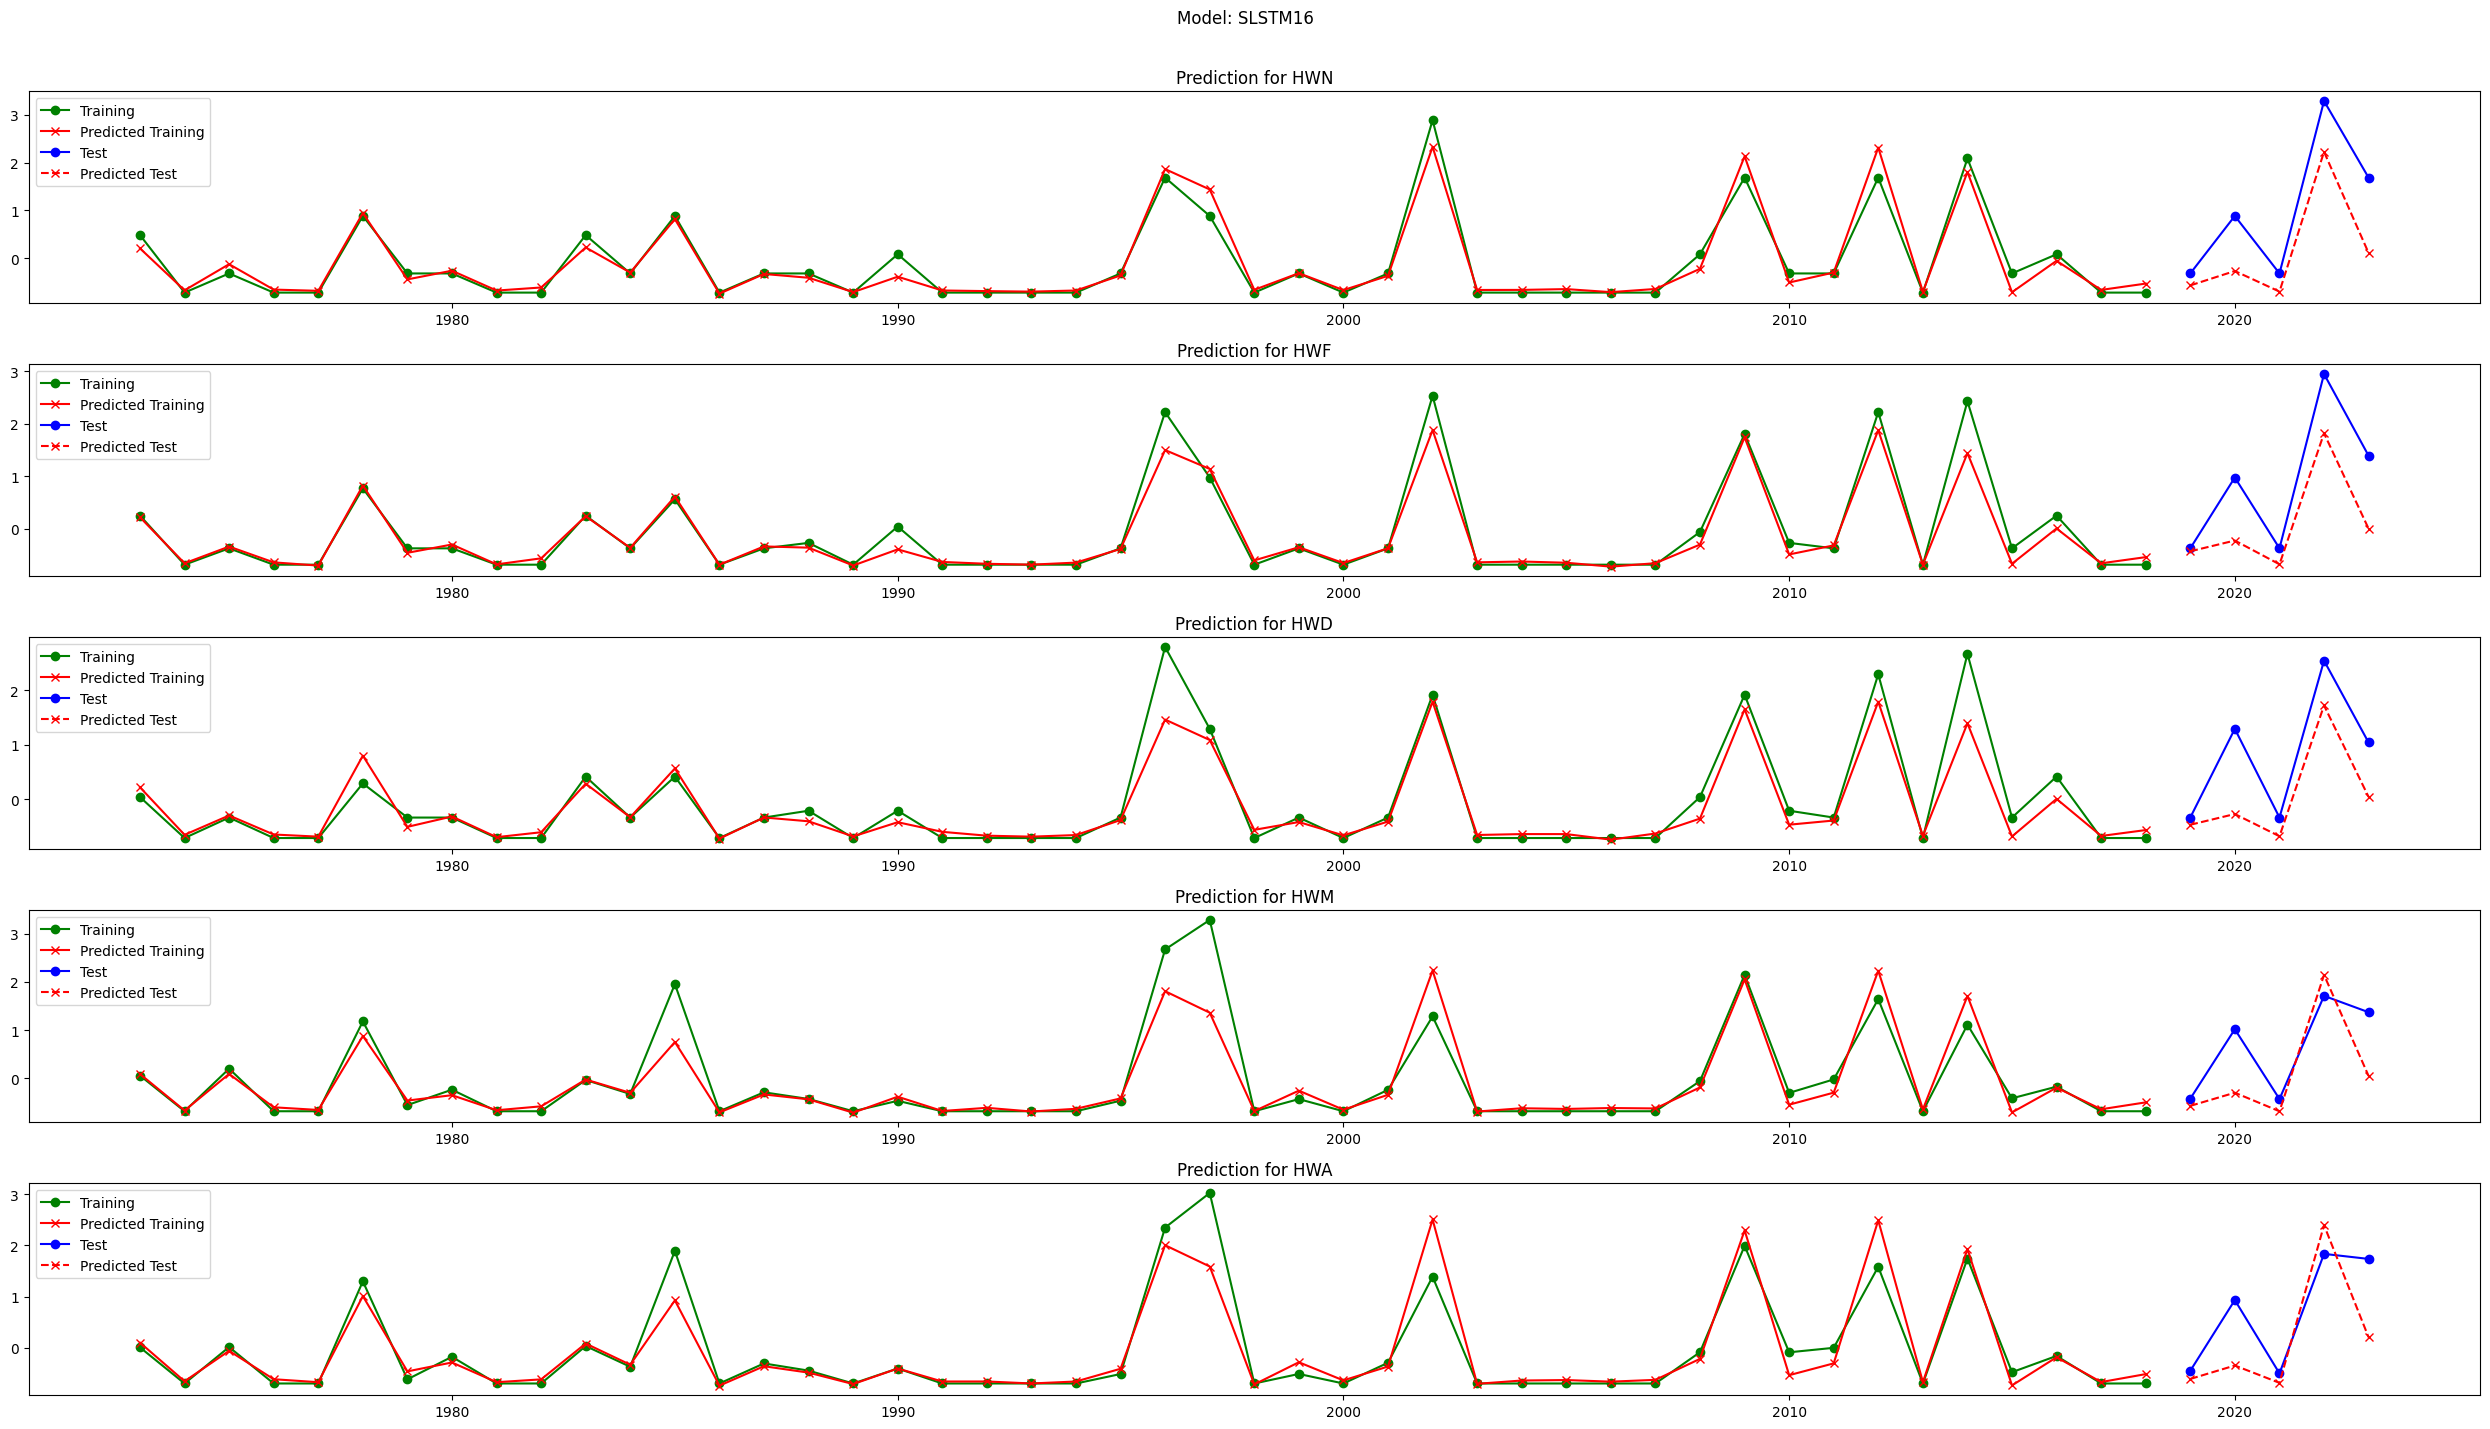

1/1 [==============================] - 0s 16ms/step


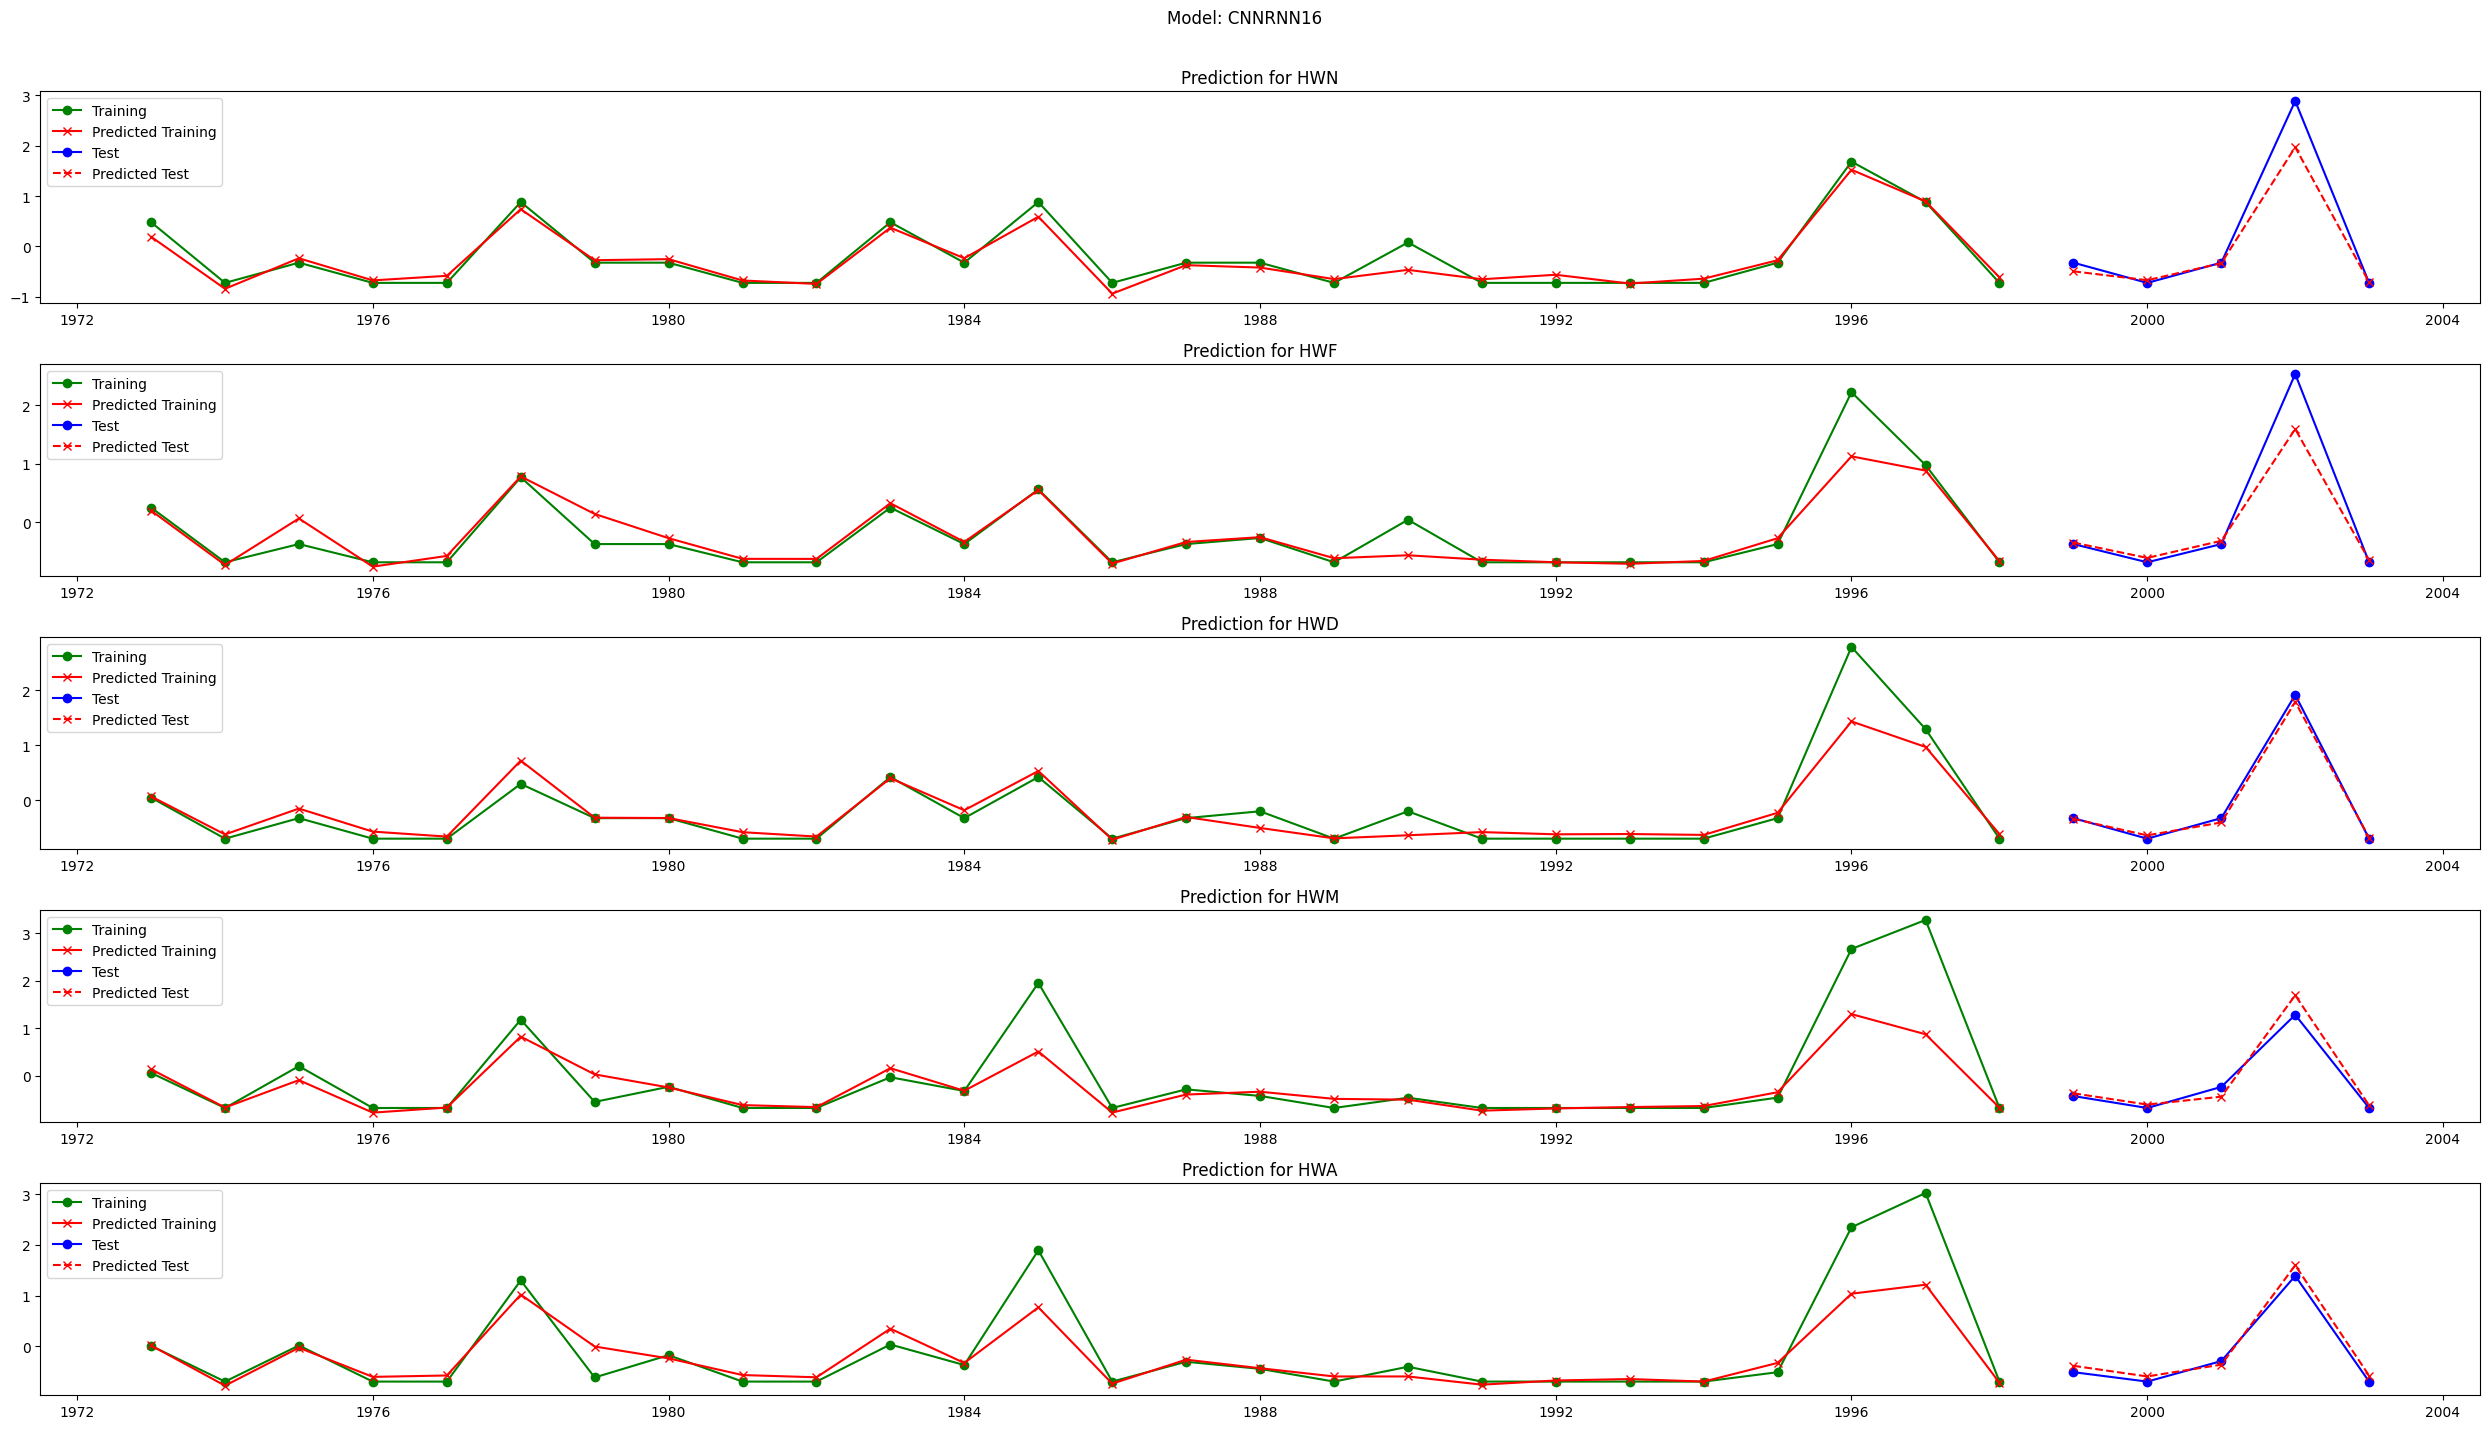

1/1 [==============================] - 0s 20ms/step


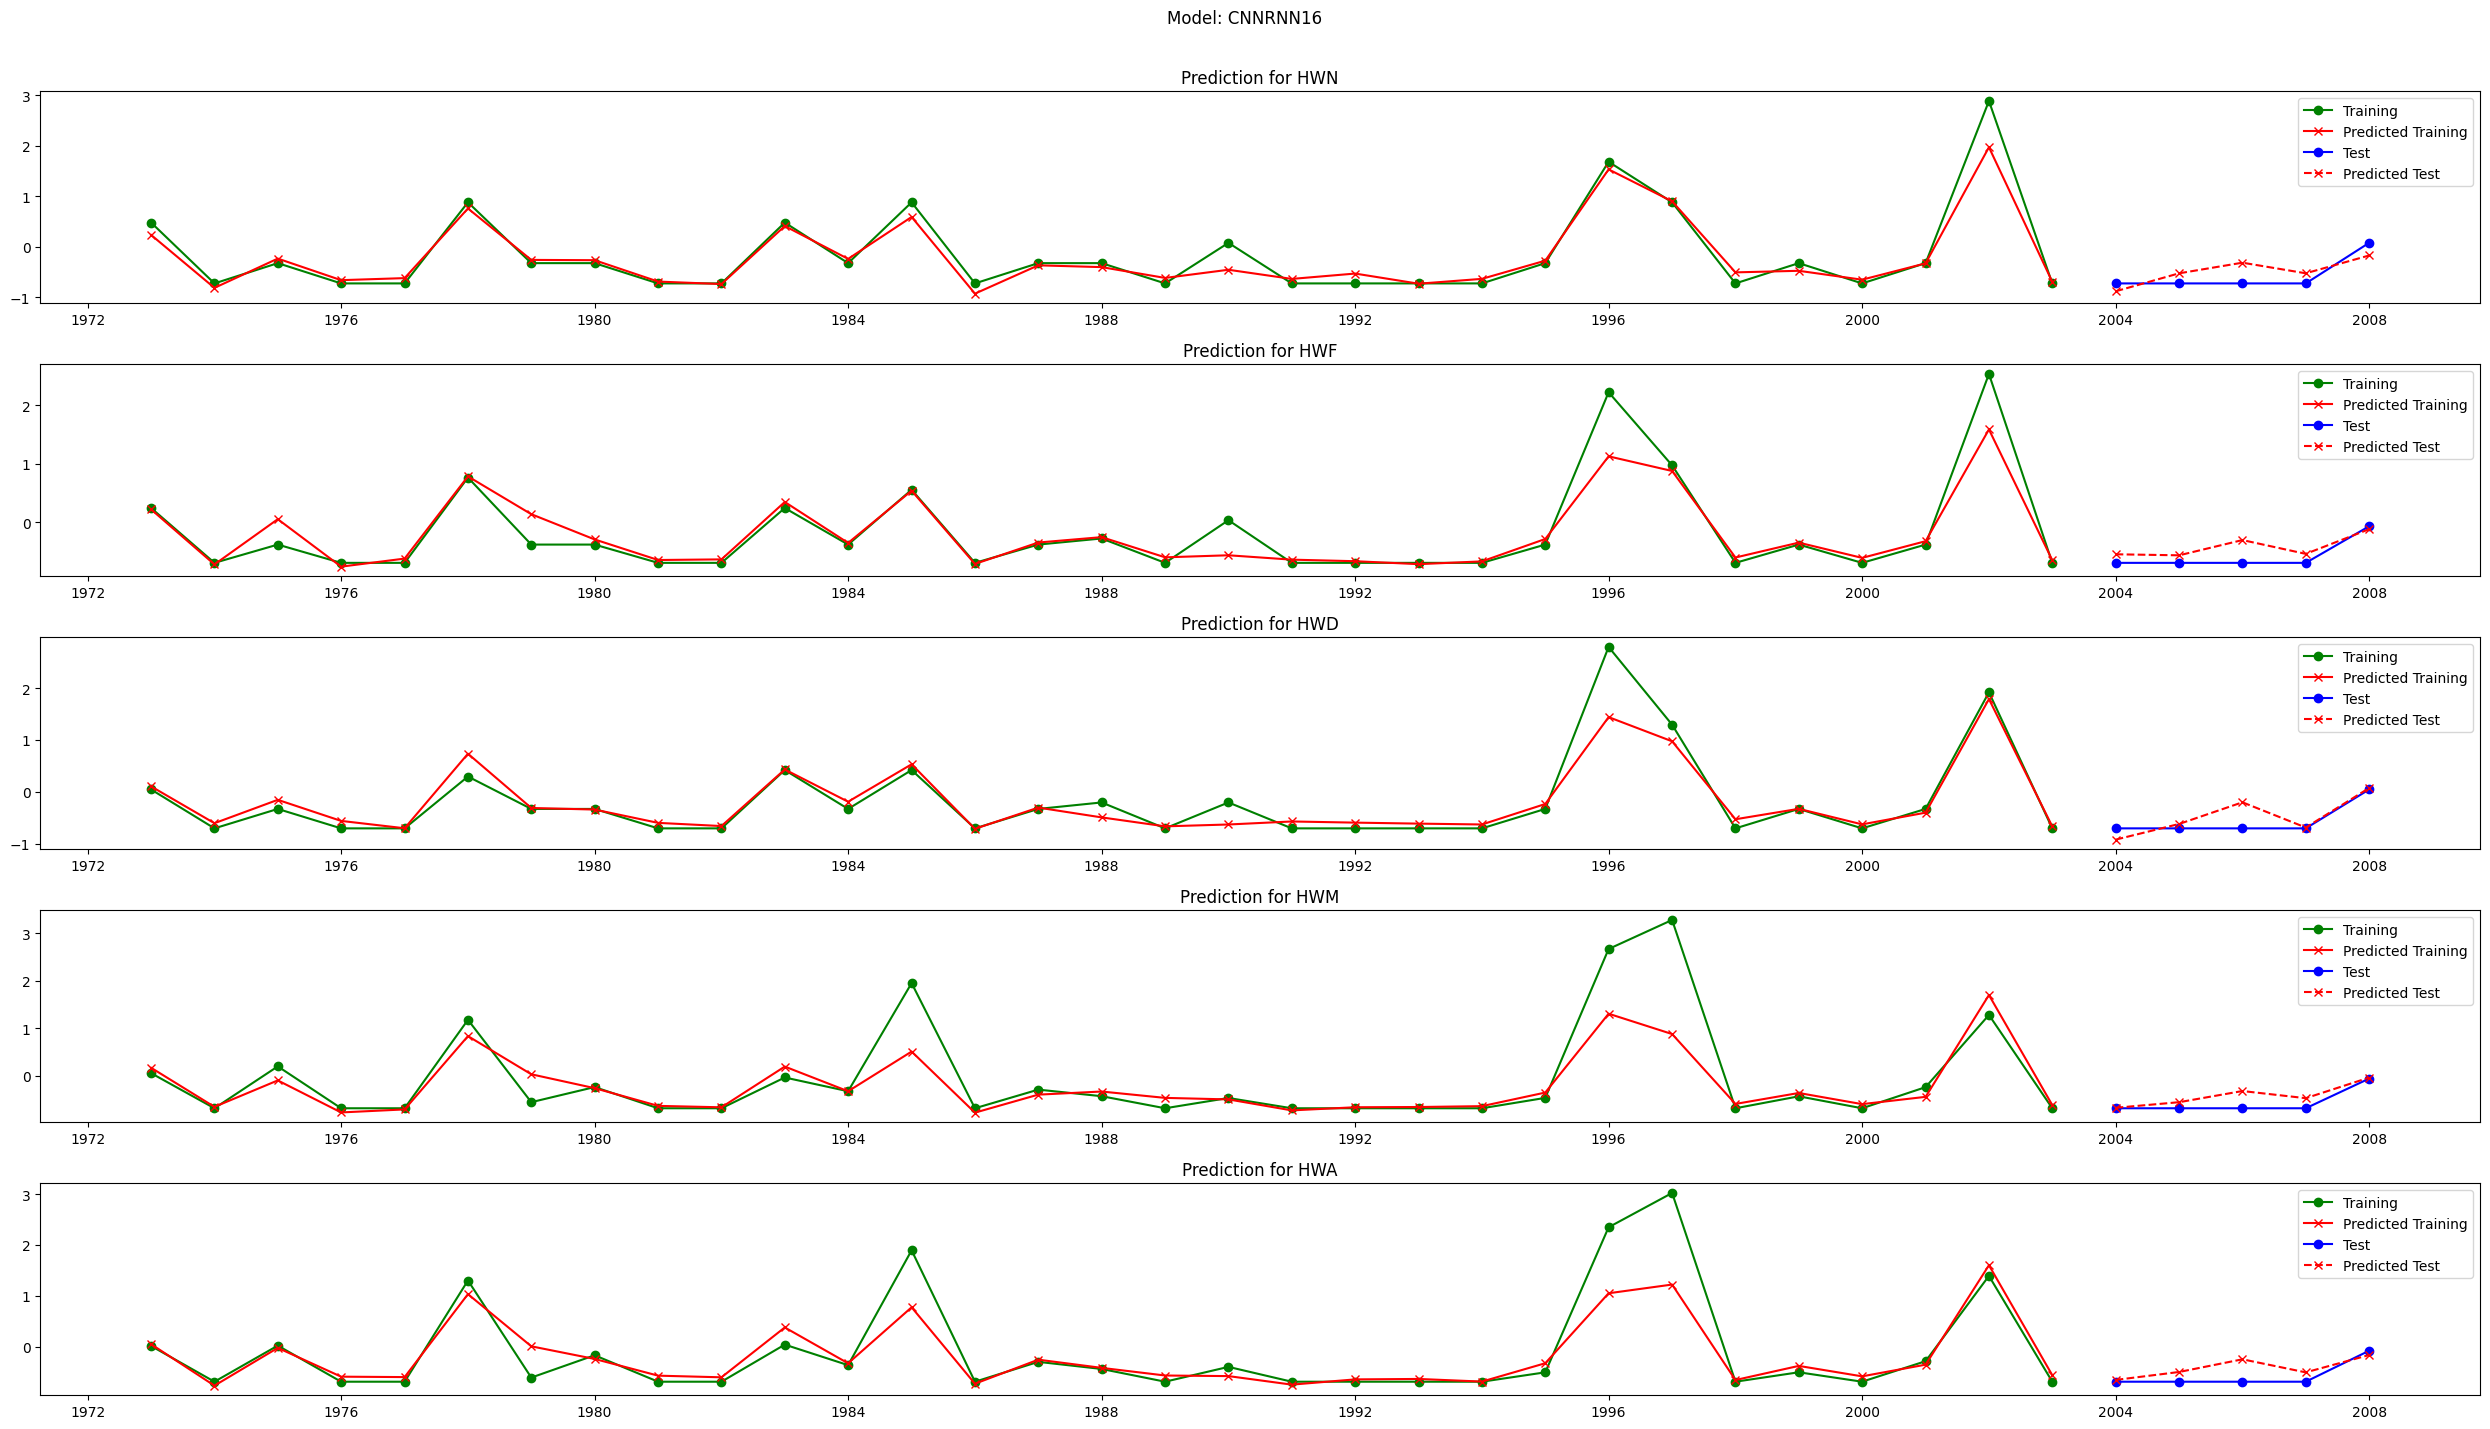

2/2 [==============================] - 0s 3ms/step


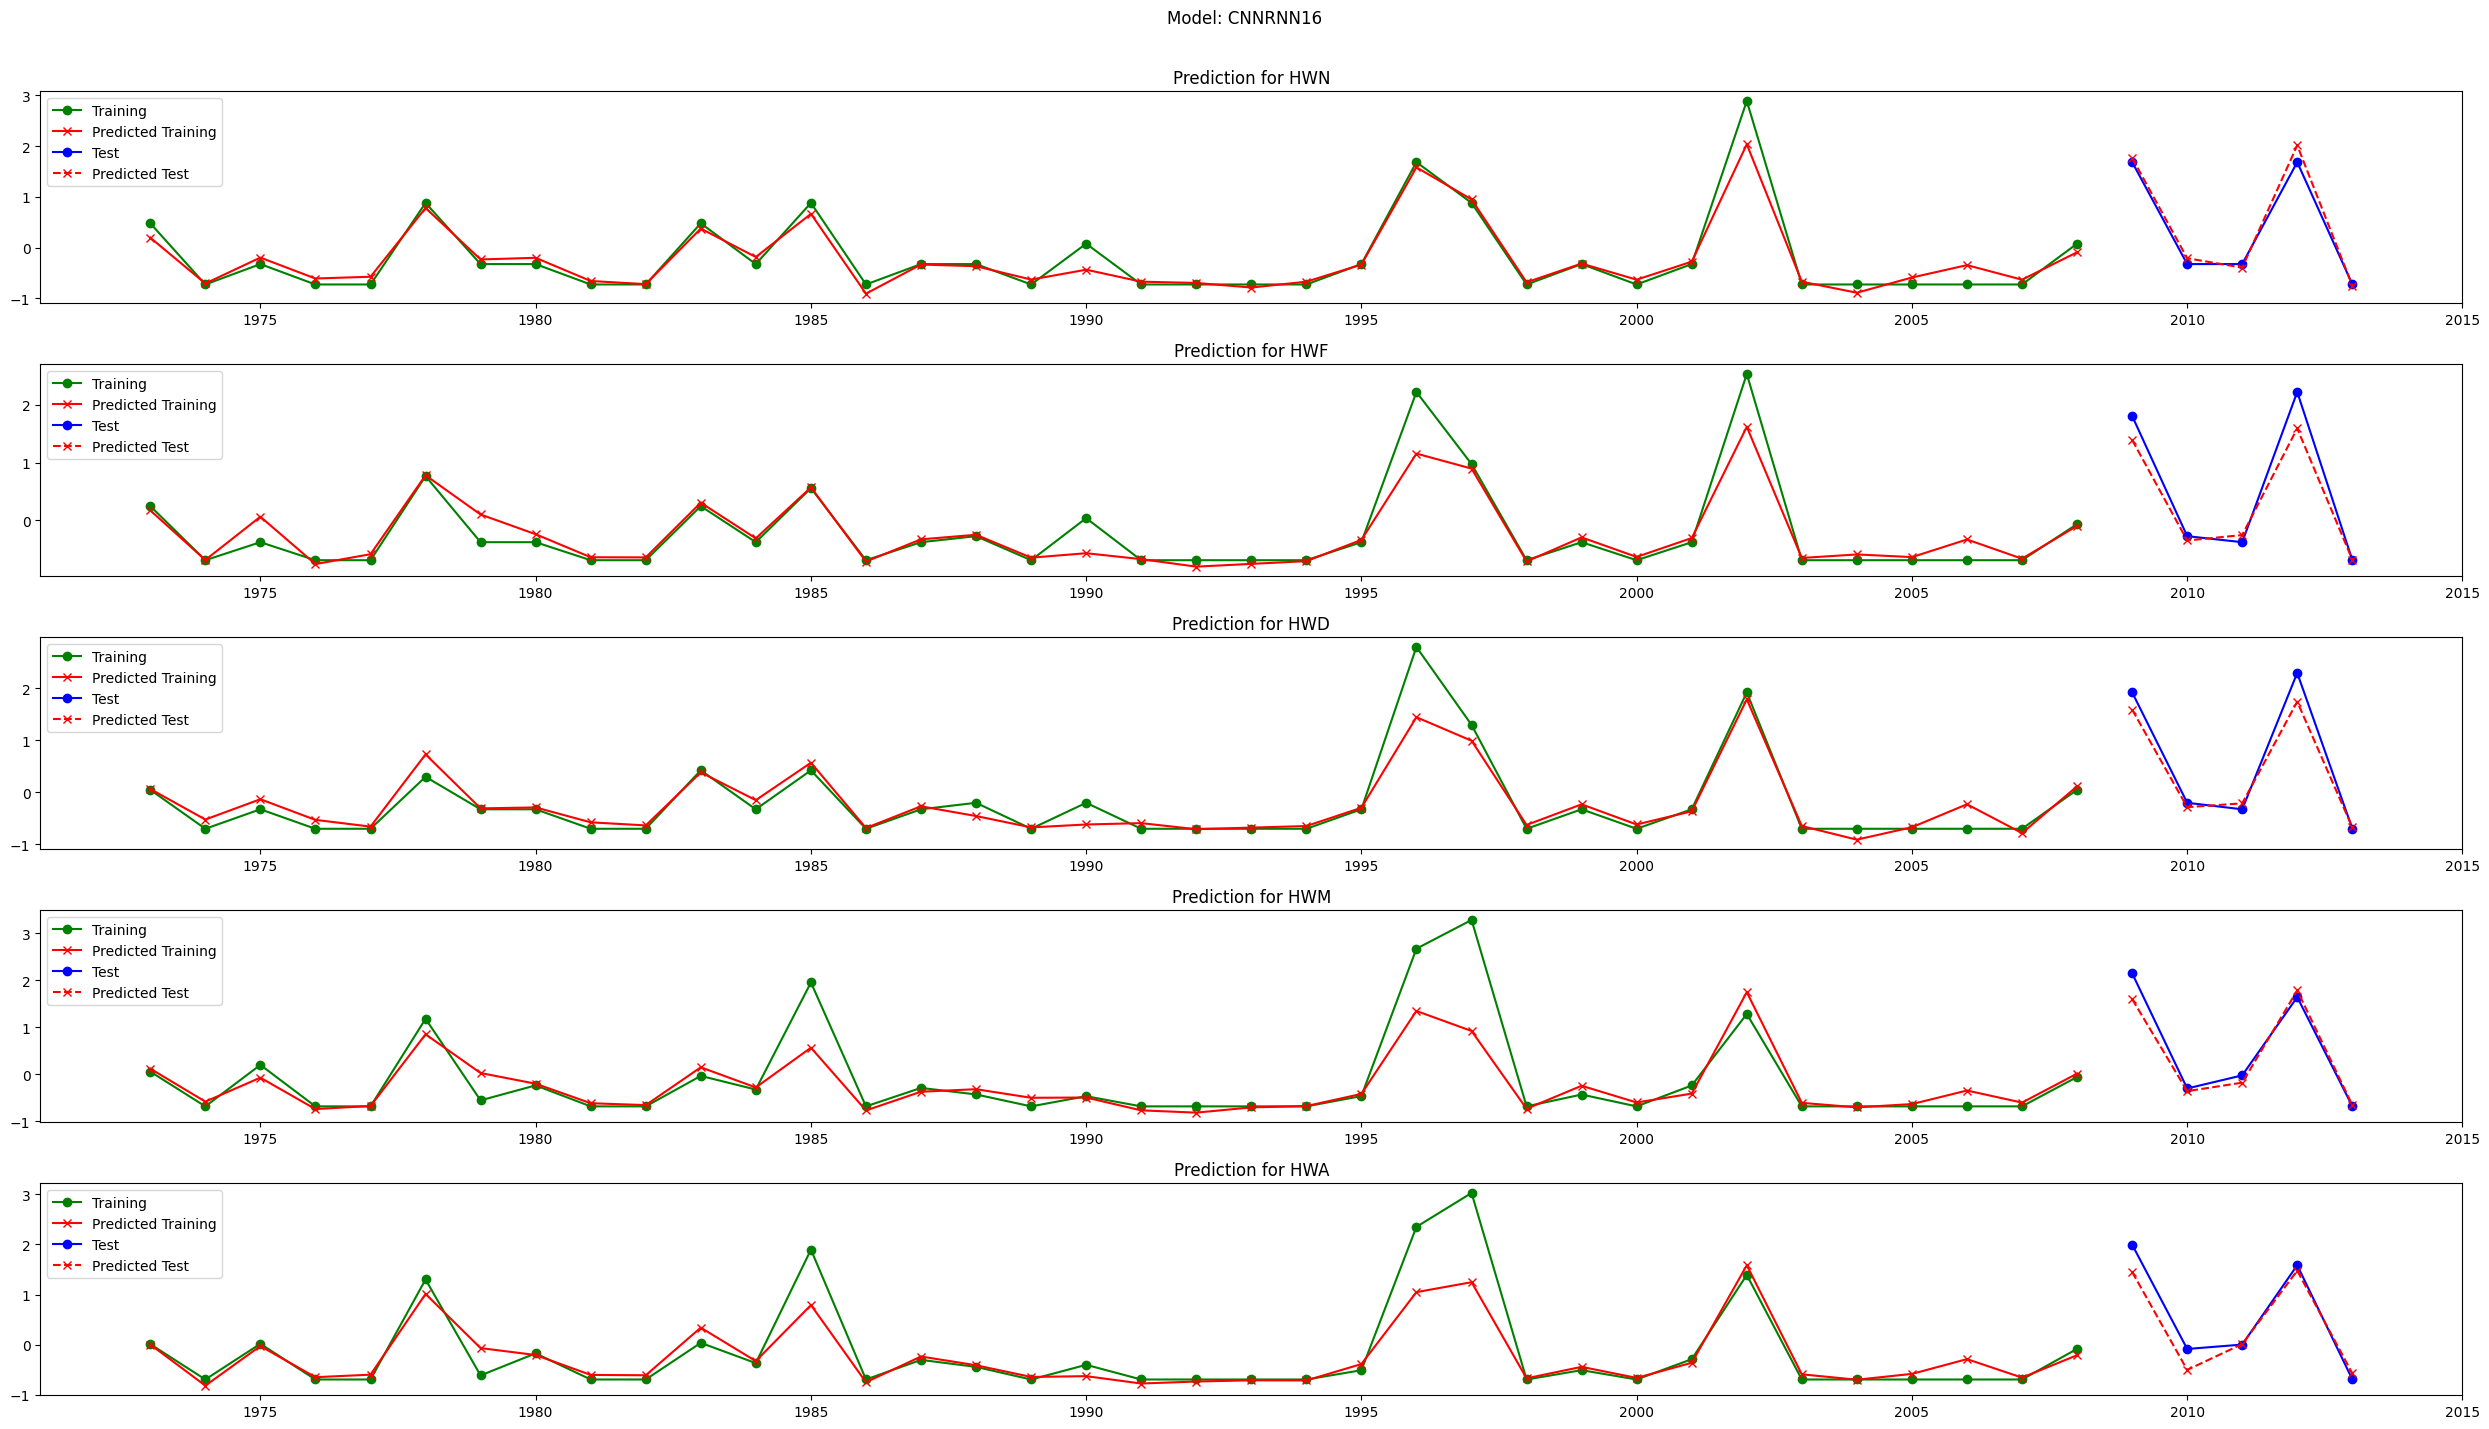

2/2 [==============================] - 0s 2ms/step


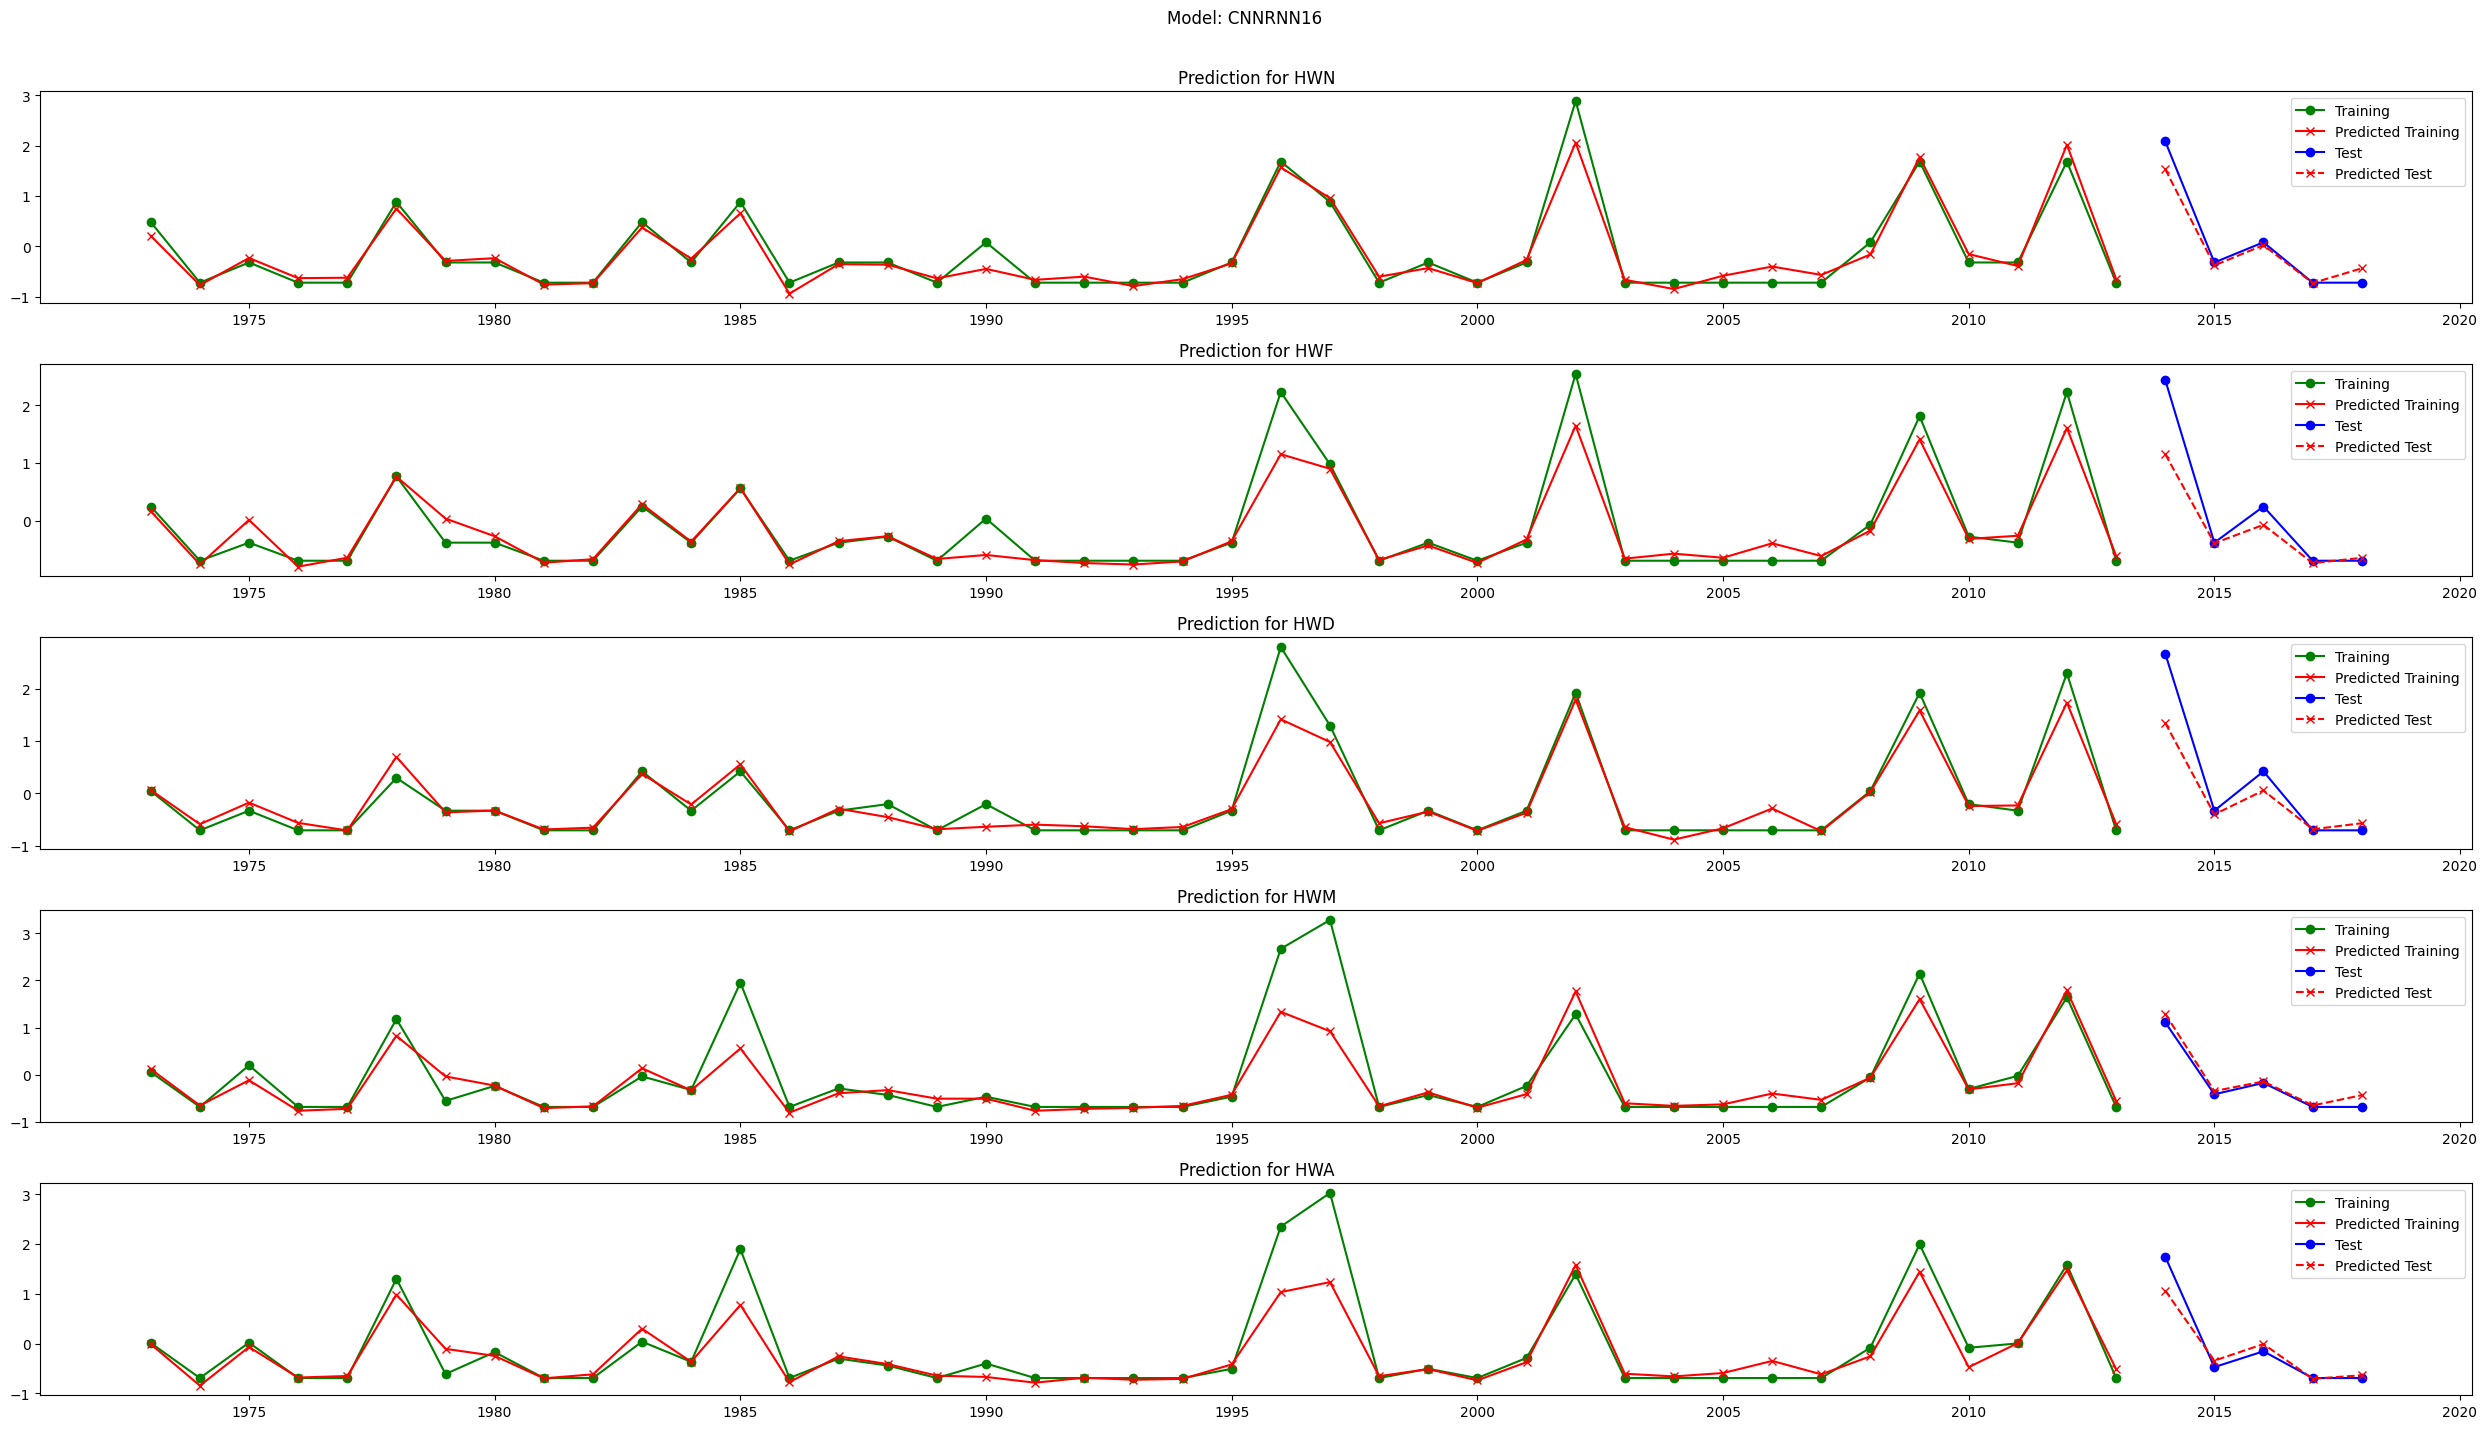

2/2 [==============================] - 0s 3ms/step


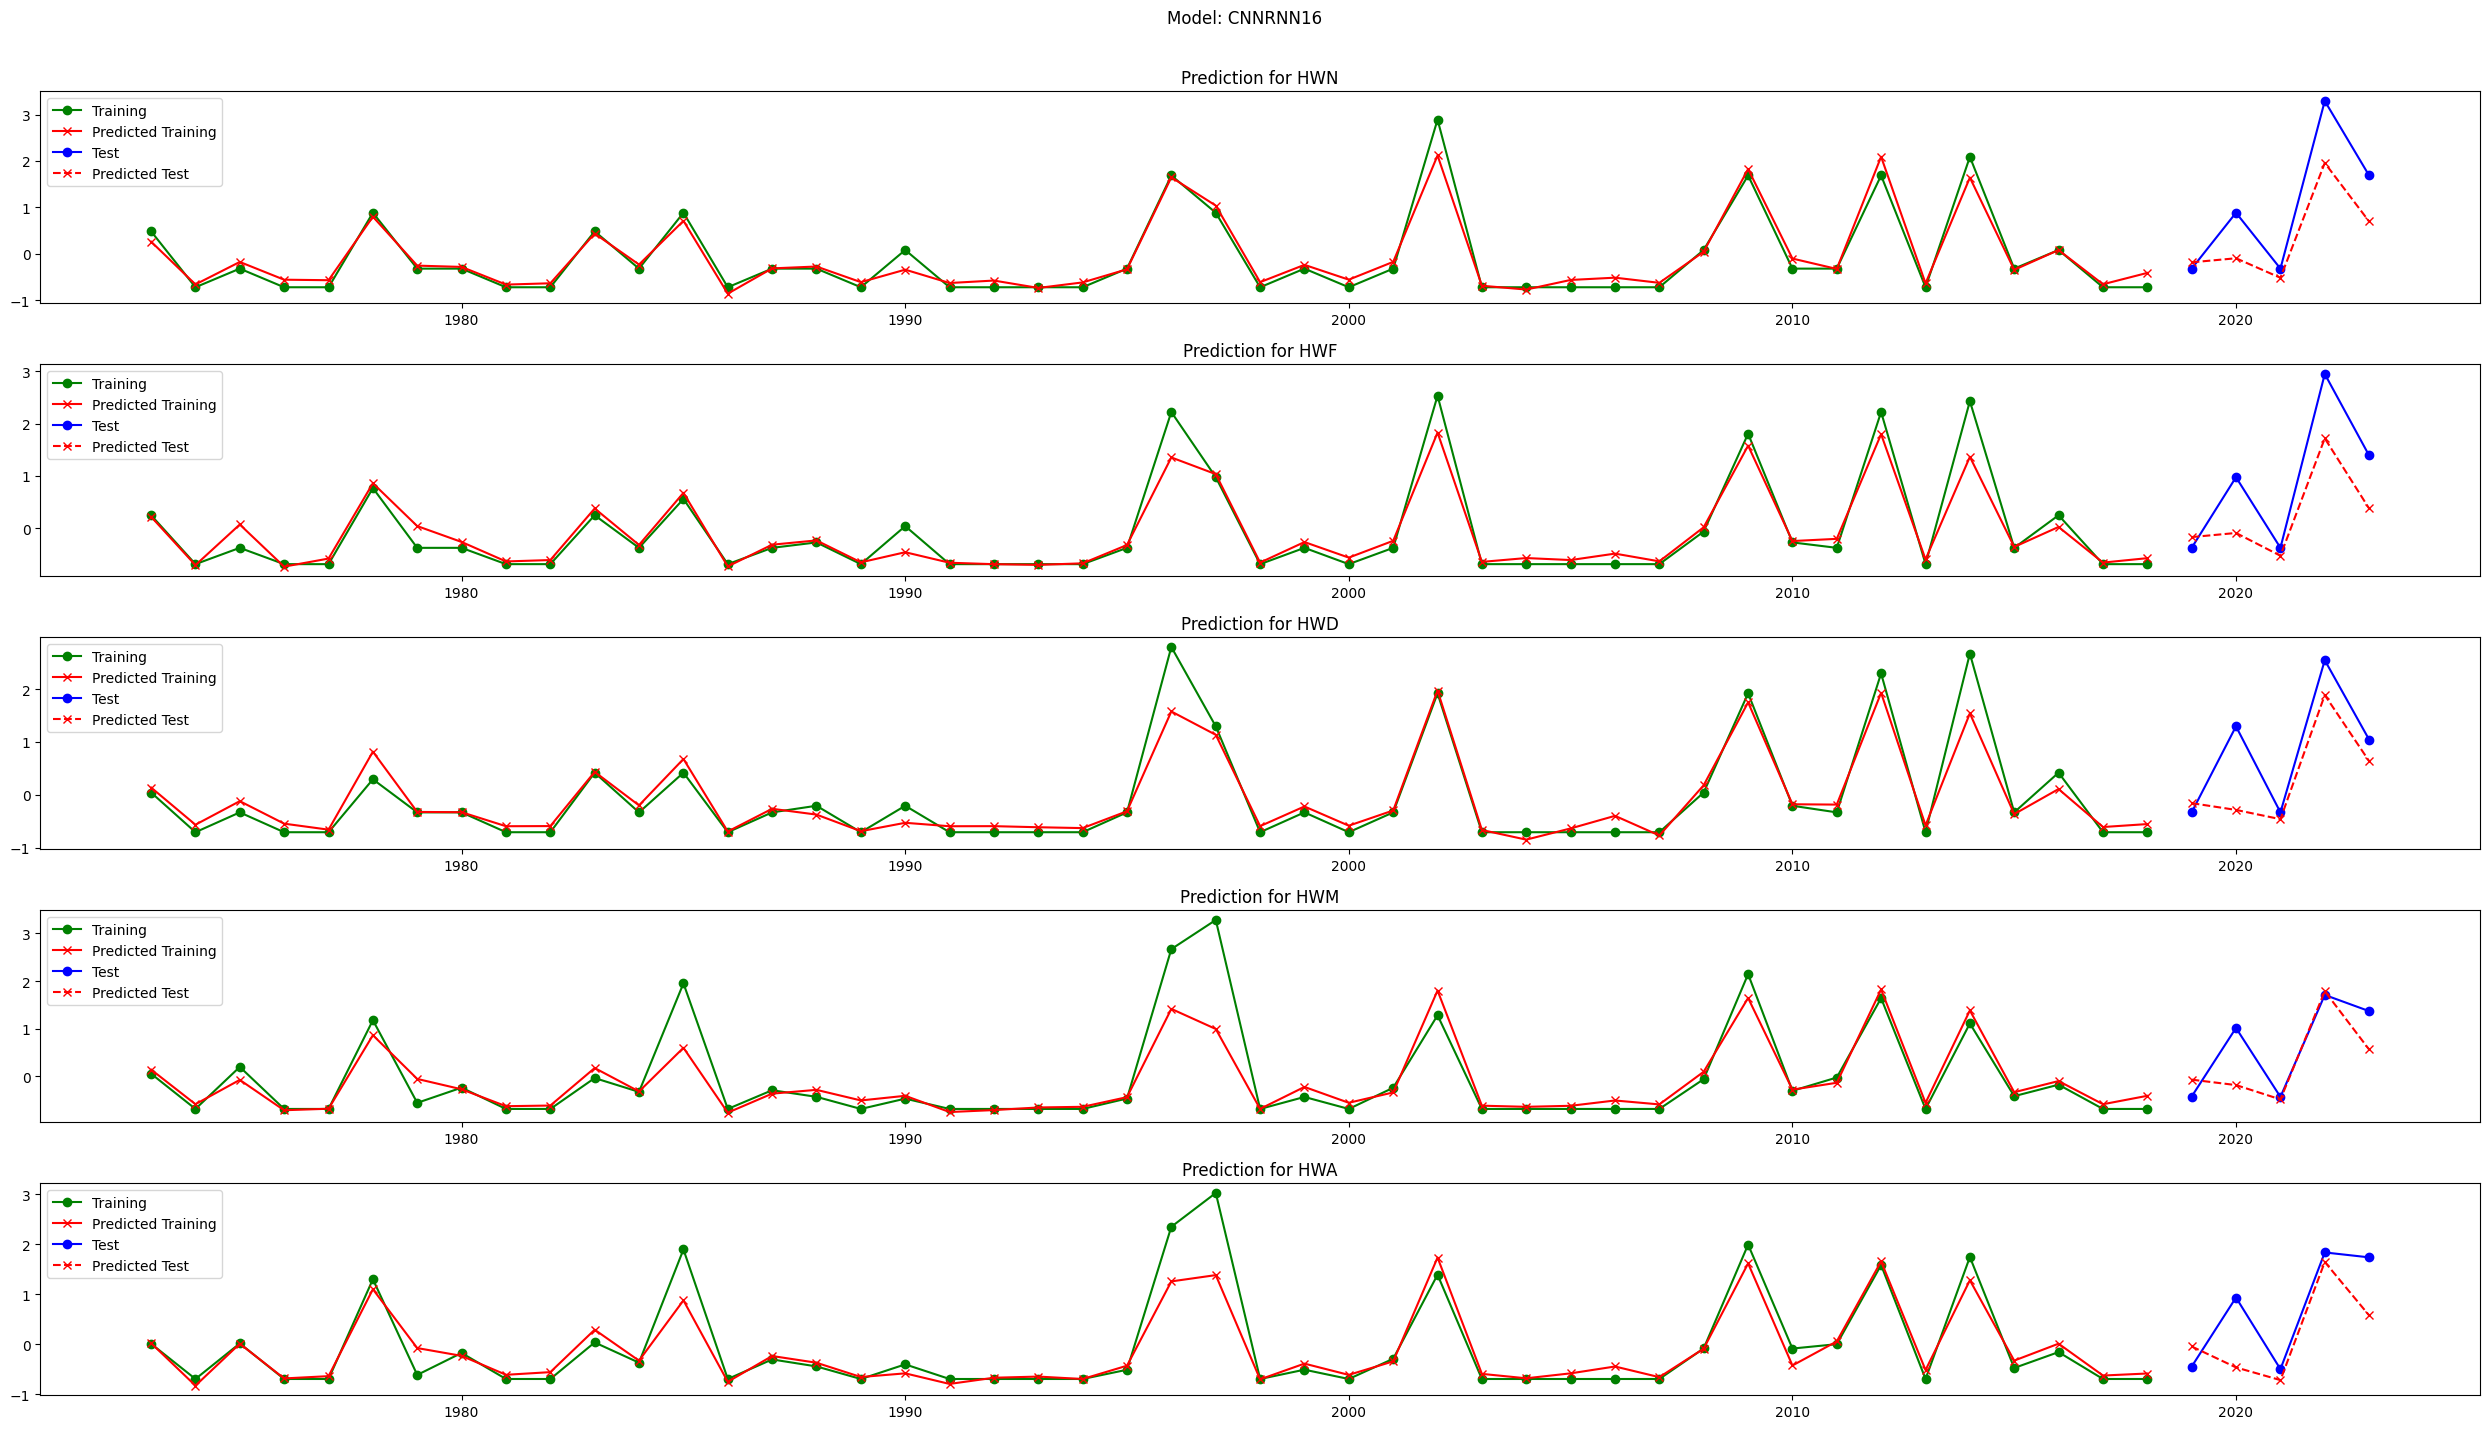

In [17]:
k=0
for id in ids_to_execute:
    k+=1
    print("Executing",id, "iter", k)
    data = {i: pd.read_parquet(f"data/climate_features/{region}/predictor_{id}_{i}.parquet") for i in range(12,13)}
    stacked_lstm = Sequential([
        LSTM(16, activation="tanh", return_sequences=True, input_shape=(1, len(data[12].columns) - len(indices_of_interest))),
        LSTM(8, activation="tanh"),
        Dropout(0.1),
        Dense(len(indices_of_interest))
    ])
    cnn_rnn_model = Sequential([
        Conv1D(16, kernel_size=1, activation="relu", input_shape=(1, len(data[12].columns) - len(indices_of_interest))),
        Reshape((1, 16)),  # Back to time dimension
        SimpleRNN(8, activation="tanh"),
        Dropout(0.1),
        Dense(len(indices_of_interest))
    ])
    # lp_model = Sequential([
    #     Flatten(input_shape=(1, len(data[12].columns) - len(indices_of_interest))),
    #     Dense(16, activation="relu"),
    #     Dropout(0.1),
    #     Dense(8, activation="relu"),
    #     Dense(len(indices_of_interest))
    # ])
    experiment_1 = PredictionExperiment(data, indices_of_interest, [stacked_lstm, cnn_rnn_model], ["SLSTM16", "CNNRNN16"], 5, id)
    experiment_1.execute_experiment(plot=True)
    experiment_1.get_metrics("r2", "prediction", show=False)
    experiment_1.get_metrics("mape", "prediction", show=False)
    experiment_1.get_metrics("r2", stage="training", show=False)
    experiment_1.get_metrics("mape", stage="training", show=False)
    experiment_1.get_metrics("r2", stage="TSCV", show=False)
    experiment_1.get_metrics("mape", stage="TSCV", show=False)
    #experiment_1.top_results("r2", 5, stage="prediction", top_data_path=f"data/results/{FREQUENCY}/top_results.csv")
    #experiment_1.top_results("cv_r2", 5, stage="CV", top_data_path=f"data/results/{FREQUENCY}/top_results.csv")
    experiment_1.save_results(f"data/climate_results/{region}_results/results.csv")